
---

# Análise exploratória de dados: Preço médio dos carros do Brasil
Dataset Kaggle: [Average car prices - Brazil](https://www.kaggle.com/datasets/vagnerbessa/average-car-prices-bazil/data) <br>
Projeto no Kaggle: https://www.kaggle.com/code/nerdygames/aed-average-car-prices-brazil <br>
Autor: Bruno Pereira <br>

---

## 1\. Contexto

**Descrição do Problema/Base de dados:** A base de dados consiste no preço médio dos carros do Brasil segundo a tabela FIPE durante os anos de 2021 e 2023. Cada linha corresponde a uma pesquisa do preço médio de um carro. Meu objetivo é fazer uma análise exploratória desses dados e traduzí-los e insights valiosos. Utilizei como guia os conceitos ensinados pela EBAC(*Escola Britânica de Artes e Tecnologia*) e principalmente o livro: **Estatística Prática para Cientistas de Dados**(*Autores: Peter Bruce & Andrew Bruce*)

## 2\. Pacotes, bibliotecas & Importações

Pacotes utilizados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator # Usado para uma customização nos eixos dos grárficos
import seaborn as sns

Funções desenvolvidas que serão utilizadas

In [2]:
# Função utilizada para verificar os valores únicos
def verifica_valores_unicos(DataFrame: pd.DataFrame, colunas_ignoradas: list|str|None) -> None:
    for x in DataFrame.columns:
    
        if type(colunas_ignoradas) == str:
            if x != colunas_ignoradas:
                print('++'*30)
                print(f'NOME DA COLUNA COLUNA: "{x}"')
                print('--'*5)
                print('VALORES ÚNICOS:')
                print(f'{DataFrame[x].unique()}')
                print('--'*5)
                print(f'CONTAGEM DOS VALORES ÚNICOS: {len(DataFrame[x].unique())}')
                print('++'*30)
                print('\n')
        
        elif type(colunas_ignoradas) == list:
            if x not in colunas_ignoradas:
                print('++'*30)
                print(f'NOME DA COLUNA COLUNA: "{x}"')
                print('--'*5)
                print('VALORES ÚNICOS:')
                print(f'{DataFrame[x].unique()}')
                print('--'*5)
                print(f'CONTAGEM DOS VALORES ÚNICOS: {len(DataFrame[x].unique())}')
                print('++'*30)
                print('\n')

        else:
            print('++'*30)
            print(f'NOME DA COLUNA COLUNA: "{x}"')
            print('--'*5)
            print('VALORES ÚNICOS:')
            print(f'{DataFrame[x].unique()}')
            print('--'*5)
            print(f'CONTAGEM DOS VALORES ÚNICOS: {len(DataFrame[x].unique())}')
            print('++'*30)
            print('\n')

# Função para criar os rótulos de alguns histogramas
def cria_intervalo_rotulos_histograma(coordenadas, arredondamento_limite_superior: int, apenas_intervalo_minimo:bool):
    # Obter os valores das barras e suas bordas
    for p in coordenadas.patches:
        width = p.get_width()  # Largura da barra
        height = p.get_height()  # Altura da barra
        x_value = p.get_x()  # Posição no eixo X
        
        if apenas_intervalo_minimo:
            # Adicionar o texto com o intervalo no topo da barra
            if height > 0:  # Verificar se a barra tem altura
                coordenadas.text(p.get_x() + width/2., height + 0.5, f' {x_value}', 
                        ha="center", va="bottom", fontsize=10, color="black", rotation=90)
        else:
            # Calcular o intervalo correspondente a essa barra
            interval_min = np.round(x_value, 1)  # Limite inferior do intervalo
            interval_max = np.round(x_value + width, arredondamento_limite_superior)  # Limite superior do intervalo
            
            # Adicionar o texto com o intervalo no topo da barra
            if height > 0:  # Verificar se a barra tem altura
                coordenadas.text(p.get_x() + width/2., height + 0.5, f' {interval_min} - {interval_max}', 
                        ha="center", va="bottom", fontsize=10, color="black", rotation=90)
 
# Função que cria um grid 1x2 com algumas configurações pré setadas               
def cria_grid_1x2(DataFrame: pd.DataFrame, x: list, y: list, hue:list, title: list, xlabel: list, ylabel: list):
    # Cria um grid de 1x2
    janela, graficos = plt.subplots(nrows=1, ncols=2, figsize=(15,7.5))

    # Gráfico 1
    sns.scatterplot(data=DataFrame, x=x[0], y=y[0], hue=hue[0], ax=graficos[0], palette='Set1')

    # Alterar os rótulos dos eixos para o gráfico 1
    graficos[0].set_title(title[0], fontsize=12)    # Título
    graficos[0].set_xlabel(xlabel[0], fontsize=10)  # Eixo X
    graficos[0].set_ylabel(ylabel[0], fontsize=10)  # Eixo Y

    # Gráfico 2
    sns.scatterplot(data=DataFrame, x=x[1], y=y[1], hue=hue[1], ax=graficos[1], palette='Set2')

    # Alterar os rótulos dos eixos para o gráfico 2
    graficos[1].set_title(title[1], fontsize=12)    # Título
    graficos[1].set_xlabel(xlabel[1], fontsize=10)  # Eixo X
    graficos[1].set_ylabel(ylabel[1], fontsize=10)  # Eixo Y

    # Exibir os gráficos
    plt.tight_layout()  # Ajusta os subplots para que não se sobreponham
    plt.show() # Exibe o grid com os gráficos

# Função para adicionar rótulo de dados com o percentual 
def plota_percentual(grafico, DataFrame: pd.DataFrame ,coluna: str):
    # Calcular a porcentagem para os gráficos
    total = len(DataFrame[coluna])
    for p in grafico.patches:
        height = p.get_height()
        percentage = 100 * height / total
        grafico.annotate(f'{percentage:.1f}%', 
                                (p.get_x() + p.get_width() / 2., height), 
                                ha='center', va='bottom', fontsize=10)

Importação da base de dados

In [3]:
df_FIPE_carros = pd.read_csv("./Materiais extras das aulas/Base - Preço medio carros Brasil/fipe_cars.csv")

## 3\. Exploração inicial dos dados

In [12]:
# Verificando as primieras linhas do DataFrame
df_FIPE_carros.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021,January,038001-6,tlp4qry07m,Acura,NSX 3.0,Gasoline,manual,3.0,1995,40374.0
1,2021,January,038001-6,s1wksdv9by,Acura,NSX 3.0,Gasoline,manual,3.0,1994,38939.0
2,2021,January,038001-6,skrbcfnkch,Acura,NSX 3.0,Gasoline,manual,3.0,1993,37648.0
3,2021,January,038001-6,rxzh76d5db,Acura,NSX 3.0,Gasoline,manual,3.0,1992,35962.0
4,2021,January,038001-6,qrm322tpd8,Acura,NSX 3.0,Gasoline,manual,3.0,1991,32863.0


In [14]:
# Verificando a dimensionalidade do DataFrame
df_FIPE_carros.shape

(599007, 11)

In [15]:
# Informações gerais sobre o DataFrame
df_FIPE_carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599007 entries, 0 to 599006
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year_of_reference   599007 non-null  int64  
 1   month_of_reference  599007 non-null  object 
 2   fipe_code           599007 non-null  object 
 3   authentication      599007 non-null  object 
 4   brand               599007 non-null  object 
 5   model               599007 non-null  object 
 6   fuel                599007 non-null  object 
 7   gear                599007 non-null  object 
 8   engine_size         599007 non-null  float64
 9   year_model          599007 non-null  int64  
 10  avg_price_brl       599007 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 50.3+ MB


**Conclusão:** Podemos notar que o DataFrame é bom limpo e consistente, sendo necessário apenas algumas conversões do tipo de alguns dados. Notamos também que a maioria dos atributos são categóricos nominais, com exeção da coluna ``month_of_reference`` que é uma coluna categórica ordinal. Existem também atributos Numéricos Contínuos e Numéricos Discretos:
- Atributos Categóricos:
    - **Nominais:** ``fipe_code``, ``authentication``, ``brand``, ``model``, ``fuel`` e ``gear``;
    - **Ordinais:** ``month_of_reference``;
- Atributos Numéricos:
    - **Contínuos:** ``avg_price_brl``, ``engine_size``;
    - **Discretos:** ``year_of_reference`` ,``year_model``.

In [18]:
# Verificando a existência de valores duplicados
valores_duplicados = df_FIPE_carros[df_FIPE_carros.duplicated()]
print("Quantidade de linhas duplicadas:",len(valores_duplicados))
valores_duplicados

Quantidade de linhas duplicadas: 3


,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
135875,2021,June,025232-8,5rtdwkpkpq5h,Renault,DUSTER OROCH Dyna. 2.0 Flex 16V Mec.,Gasoline,manual,2.0,2018,69893.0
383231,2022,May,004051-7,gb76cyvp29j4,GM - Chevrolet,Monza Classic SE 2.0 /MPFI e EFI 2p e 4p,Gasoline,manual,2.0,1992,10655.0
559711,2022,December,003296-4,3r6c277cnqcb,Ford,Ranger Limited 3.0 PSE 4x4 CD TB Diesel,Diesel,manual,3.0,2007,64638.0


**Conclusão:** Existem 3 valores duplicados nessa base de dados que faremos a exclusão na etapa de Wrangling.

In [19]:
# Verificando as informações sobre únicas sobre alguns atributos
verifica_valores_unicos(DataFrame=df_FIPE_carros, colunas_ignoradas=['authentication', 'avg_price_brl'])

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
NOME DA COLUNA COLUNA: "year_of_reference"
----------
VALORES ÚNICOS:
[2021 2022 2023]
----------
CONTAGEM DOS VALORES ÚNICOS: 3
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
NOME DA COLUNA COLUNA: "month_of_reference"
----------
VALORES ÚNICOS:
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']
----------
CONTAGEM DOS VALORES ÚNICOS: 12
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
NOME DA COLUNA COLUNA: "fipe_code"
----------
VALORES ÚNICOS:
['038001-6' '038002-4' '038003-2' ... '005538-7' '005539-5' '005540-9']
----------
CONTAGEM DOS VALORES ÚNICOS: 5956
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
NOME DA COLUNA COLUNA: "brand"
-

c:\Python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


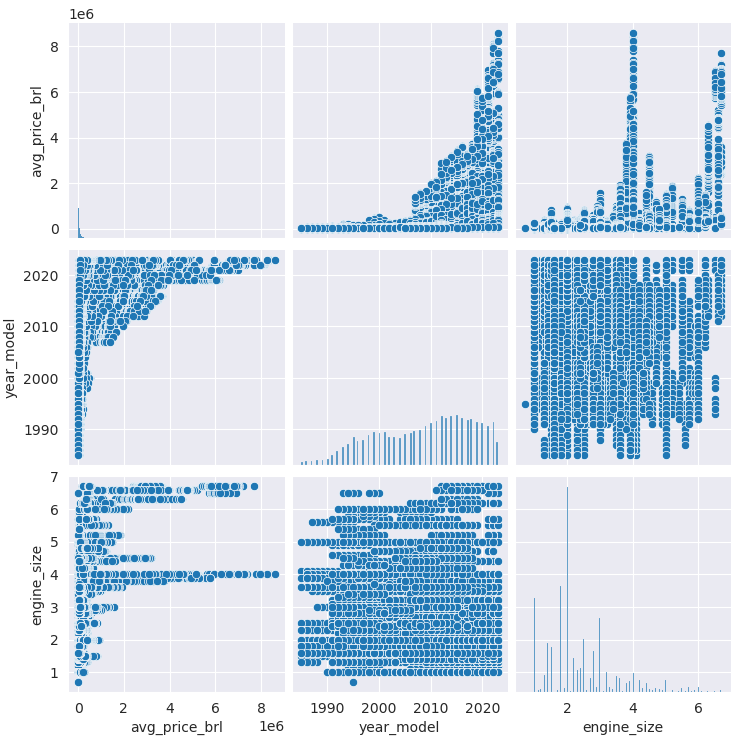

In [32]:
# Fazendo uma breve analise das correlações em pares de alguns atributos não categóricos para entendermos a vertente que iremos atacar
with sns.axes_style('darkgrid'):

  grafico = sns.pairplot(data=df_FIPE_carros[['avg_price_brl', 'year_model', 'engine_size']], palette="pastel")

**Conclusão:** Podemos notar que alguns gráficos possuem uma certa correlação, trataremos esse viés mais a diante

## 4\. Wrangling

Excluindo as linhas duplicadas

In [4]:
df_FIPE_carros.drop_duplicates(inplace=True)

Excluindo as colunas que não utilizaremos

In [5]:
df_FIPE_carros.drop(columns=['authentication', 'fipe_code'], inplace=True)

Criação de uma coluna com a idade do carro para faciliar a compreensão
- **OBS:** Utilizei o código ``df['idade_carro'] = df['idade_carro'].apply(lambda x: 0 if x < 0 else x)`` pois caso for feita apenas a subtração entre as colunas year_of_reference e year_model gerará alguns idades com o valor -1 por causa da forma como os anos são registrados na tabela FIPE. Especificamente, quando um carro é registrado como "modelo do próximo ano", ele terá um year_model maior que o year_of_reference, resultando em um valor negativo ao calcular a idade do carro.

In [6]:
df_FIPE_carros["Idade_do_automovel"] = df_FIPE_carros['year_of_reference'] - df_FIPE_carros['year_model']
df_FIPE_carros['Idade_do_automovel'] = df_FIPE_carros['Idade_do_automovel'].apply(lambda x: 0 if x < 0 else x)


Transformando alguns do tipo de atributos de object para category

In [7]:
df_FIPE_carros['month_of_reference'] = df_FIPE_carros['month_of_reference'].astype('category')
df_FIPE_carros['brand'] = df_FIPE_carros['brand'].astype('category')
df_FIPE_carros['model'] = df_FIPE_carros['model'].astype('category')
df_FIPE_carros['fuel'] = df_FIPE_carros['fuel'].astype('category')
df_FIPE_carros['gear'] = df_FIPE_carros['gear'].astype('category')

Renomeando as colunas

In [8]:

df_FIPE_carros.rename(columns={'year_of_reference': 'ano_de_referencia', 
                               'month_of_reference': 'mes_de_referencia',
                               'brand': 'marca', 
                               'model': 'modelo', 
                               'fuel': 'combustivel', 
                               'gear': 'cambio', 
                               'engine_size': 'potencia_do_motor', 
                               'year_model': 'ano_modelo', 
                               'avg_price_brl': 'preco_medio_FIPE', 
                                }, 
                    inplace = True)

Reordenando as colunas para melhor compreensão

In [9]:
df_FIPE_carros = df_FIPE_carros[['mes_de_referencia', 'ano_de_referencia', 'ano_modelo', 
                                 'Idade_do_automovel', 'marca', 'modelo', 'preco_medio_FIPE', 
                                 'potencia_do_motor','combustivel', 'cambio']]

## 5\. Visualização

### I. Explorando a correlação dos dados

Na etapa de exploração inicial dos dados, realizamos uma breve análise das informações da nossa amostra. Os gráficos de dispersões nos mostraram uma possível correlação entre alguns atributos, dentre os quais destaco: ``preco_medio_FIPE`` x ``Idade_do_automovel`` e ``preco_medio_FIPE`` x ``potencia_do_motor``. Para confirmar nossa observação, calcularemos o coeficiente de correlação de Pearson, que nos oferece uma estimativa da relação entre duas variáveis.

In [37]:
print(f"r:{df_FIPE_carros['preco_medio_FIPE'].corr(df_FIPE_carros['Idade_do_automovel'], method='pearson')}")
print(f"r: {df_FIPE_carros['preco_medio_FIPE'].corr(df_FIPE_carros['potencia_do_motor'], method='pearson')}")

r:-0.30263835401753564
r: 0.34586073065422374


**Conclusão:** Após o cálculo, notamos que a correlação entre o ``preco_medio_FIPE`` e a ``Idade_do_automovel`` resultou em -0,30. Quanto mais próximo de 1, mais forte é a correlação. Esse valor indica uma correlação fraca, e como o coeficiente é negativo, significa que as variáveis se movem em direções opostas, ou seja, à medida que a idade do automóvel aumenta, o preço médio tende a diminuir. O coeficiente de correlação entre o ``preco_medio_FIPE`` e a ``potencia_do_motor`` foi de 0,34. O comportamento é semelhante, mas como o coeficiente foi positivo, isso indica que, à medida que a potência do motor aumenta, o preço médio também aumenta. Entretanto, não podemos confiar muito nesse tipo de correlação, pois uma variável depende pouco da outra (já que a correlação é fraca). Isso significa que, na nossa amostra, podem aparecer tanto carros muito velhos e caros quanto carros novos, porém muito baratos.

Atributo: ``preco_medio_FIPE`` x ``Idade_do_automovel``

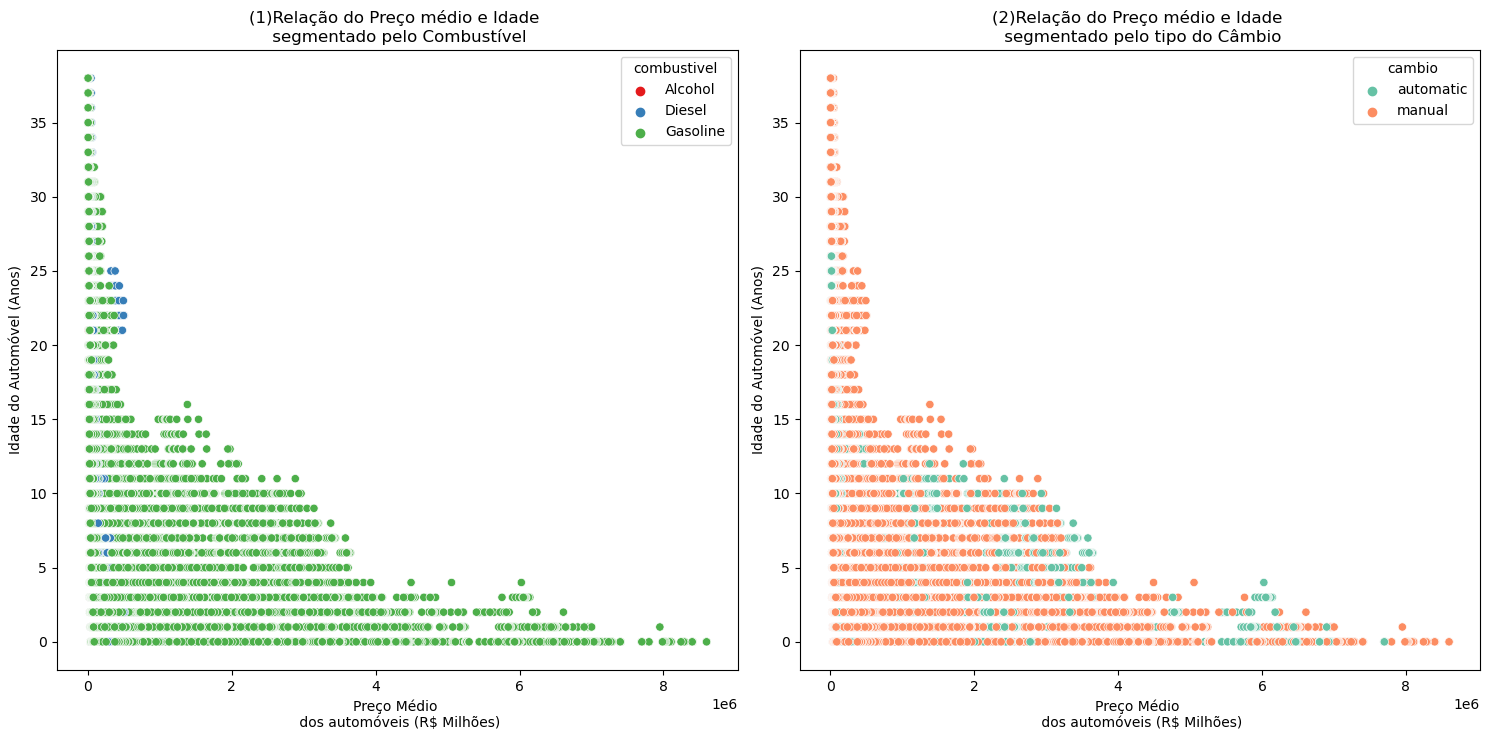

In [38]:
cria_grid_1x2(DataFrame=df_FIPE_carros, x=['preco_medio_FIPE']*2, y=['Idade_do_automovel']*2, hue=['combustivel', 'cambio'],
                title=['(1)Relação do Preço médio e Idade \n segmentado pelo Combustível', '(2)Relação do Preço médio e Idade \n segmentado pelo tipo do Câmbio'],
                xlabel=['Preço Médio \n dos automóveis (R$ Milhões)']*2, 
                ylabel=['Idade do Automóvel (Anos)']*2)

**Conclusão:** Podemos analisar que a maior parte dos automóveis está agrupada à esquerda do gráfico, representando carros mais novos, porém não tão caros. Visualmente, notamos que, quanto maior a idade do automóvel, menor o preço médio. O tipo de combustível parece não influenciar no preço médio do carro, sendo a gasolina o combustível mais frequente. A mesma lógica se aplica ao tipo de câmbio.

Atributo: ``potencia_do_motor`` x ``preco_medio_FIPE``

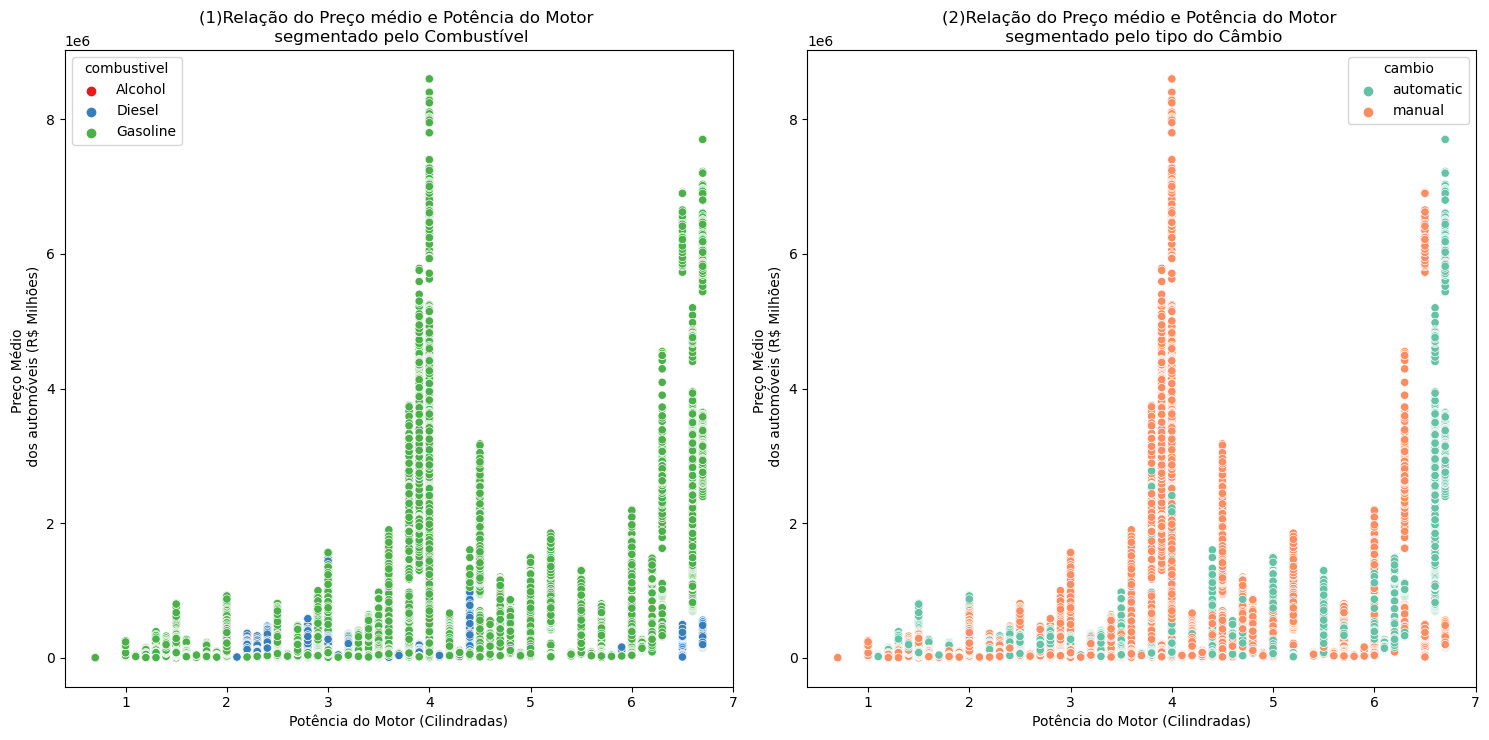

In [39]:
cria_grid_1x2(DataFrame=df_FIPE_carros, x=['potencia_do_motor']*2, y=['preco_medio_FIPE']*2, hue=['combustivel', 'cambio'],
            title=['(1)Relação do Preço médio e Potência do Motor \n segmentado pelo Combustível', '(2)Relação do Preço médio e Potência do Motor \n segmentado pelo tipo do Câmbio'],
            xlabel=['Potência do Motor (Cilindradas)']*2, 
            ylabel=['Preço Médio \n dos automóveis (R$ Milhões)']*2)

**Conclusão:** Podemos observar que, conforme a potência do motor aumenta, o preço médio tende a subir. Curiosamente, existem algumas exceções a essa regra, como os motores no intervalo de 3,8 a 4 cilindros, que apresentam uma grande variabilidade nos preços médios. À primeira vista, pode parecer que existem muito mais motores de 4 cilindradas do que de 2, porém essa suposição pode ser refutada com a tabela abaixo:

In [40]:
demosntracao_desvio_potencia_dos_motores_df = df_FIPE_carros.groupby('potencia_do_motor').agg(
    frequencia_potencia=('potencia_do_motor', 'count'),
    desvio_preco_medio=('preco_medio_FIPE', 'std')
).sort_values(by='desvio_preco_medio', ascending=False).reset_index().round(2)

demosntracao_desvio_potencia_dos_motores_df.index = pd.Index(range(1, len(demosntracao_desvio_potencia_dos_motores_df) + 1)) # Index começando a contar do 1 envés do 0
demosntracao_desvio_potencia_dos_motores_df.head(25)

,potencia_do_motor,frequencia_potencia,desvio_preco_medio
1,6.7,680,2438864.41
2,6.5,433,2128164.94
3,6.3,425,1196659.59
4,3.9,5804,1084761.54
5,4.0,9495,1078956.69
6,6.6,567,957755.94
7,4.5,1300,737882.73
8,3.8,4640,664131.34
9,5.2,1111,459726.06
10,6.0,2263,439001.17


Esse DataFrame acima está ordenado de forma decrescente pela coluna do desvio padrão dos preços dos automóveis, exibindo os 25 maiores resultados em termos de dispersão dos preços médios. Note que os motores com 3.8, 3.9 e 4 cilindradas ocupam a 8ª, 4ª e 5ª posição respectivamente entre os motores com maior variabilidade de preços, enquanto os motores de 2 cilindros ocupam a 24ª posição. Ou seja, embora os motores de 2 cilindros sejam 10 vezes mais frequentes que os de 4 cilindros, eles apresentam menor variação nos preços médios.

### II. Explorando a distribuição dos dados

Atributo: ``potencia_do_motor``

Q1 equivale a: 1.6 cilindradas
A mediana é: 2.0 cilindradas
Q3 equivale a: 2.8 cilindradas


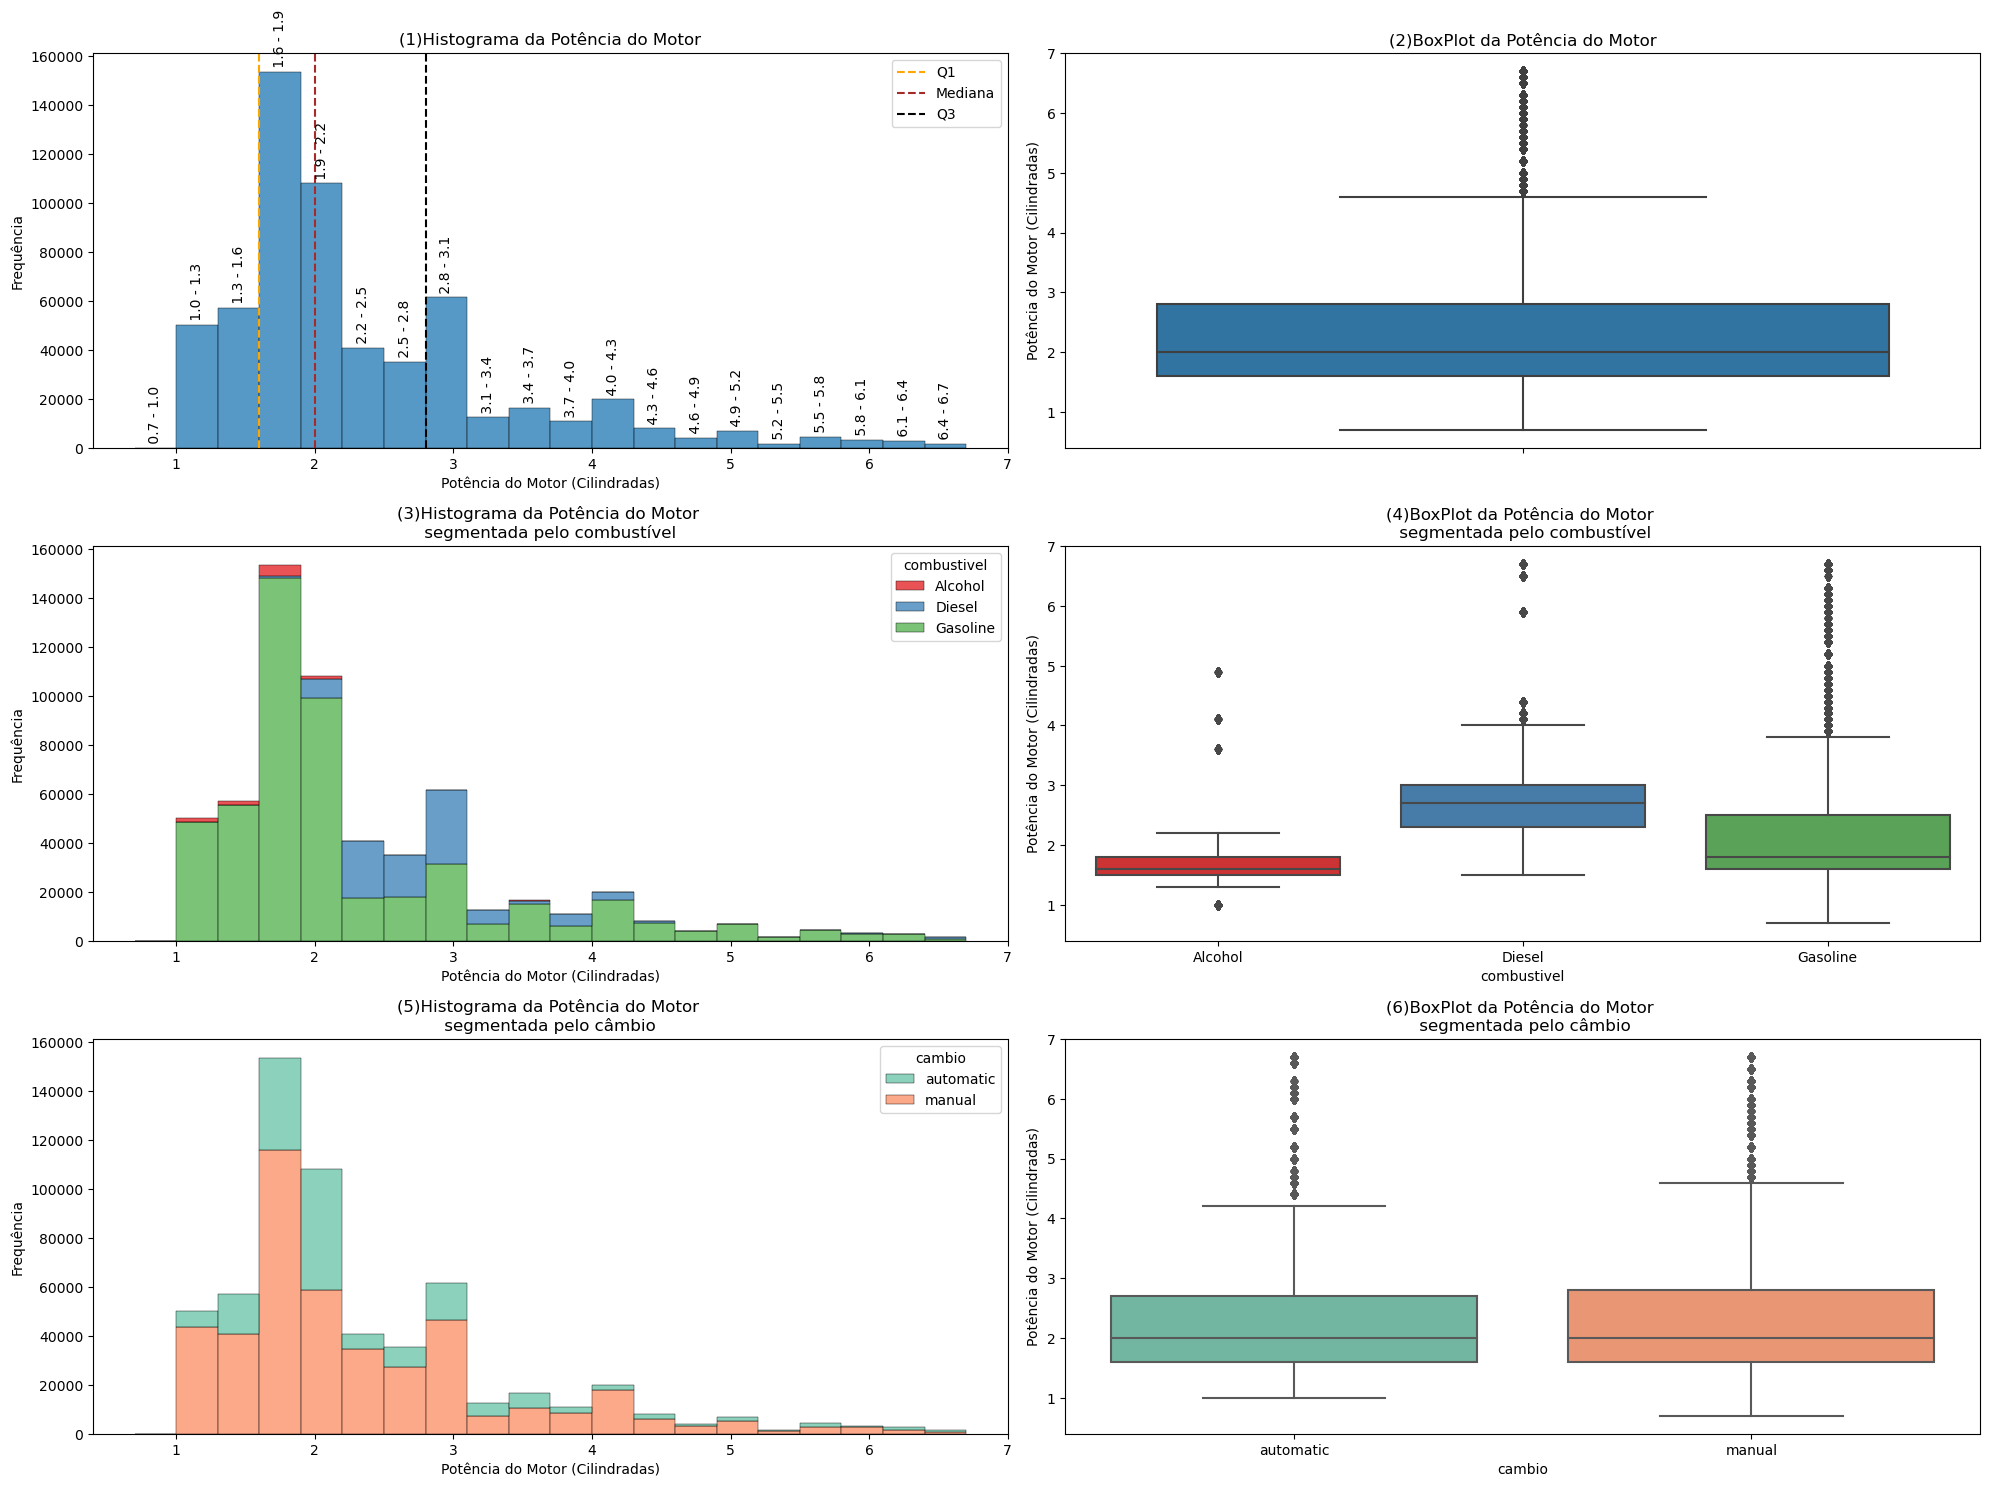

In [41]:
# Criação dos Grids 3x2
janela, graficos = plt.subplots(nrows=3, ncols=2, figsize=(20,15))

quartil_25 = np.percentile(df_FIPE_carros['potencia_do_motor'], 25)
quartil_50 = np.percentile(df_FIPE_carros['potencia_do_motor'], 50)
quartil_75 = np.percentile(df_FIPE_carros['potencia_do_motor'], 75)
print(f'Q1 equivale a: {quartil_25} cilindradas')
print(f'A mediana é: {quartil_50} cilindradas')
print(f'Q3 equivale a: {quartil_75} cilindradas')

# Gráfico 1
#-----------
# Criação do gráfico 1
sns.histplot(data=df_FIPE_carros, x='potencia_do_motor', bins=20, ax=graficos[0][0], edgecolor="black", linewidth=0.3)

cria_intervalo_rotulos_histograma(coordenadas=graficos[0][0], arredondamento_limite_superior=1, apenas_intervalo_minimo=False)

# Customizações adicionais do gráfico 1
graficos[0][0].set_title('(1)Histograma da Potência do Motor', fontsize=12)
graficos[0][0].set_xlabel('Potência do Motor (Cilindradas)', fontsize=10)
graficos[0][0].set_ylabel('Frequência', fontsize=10)
graficos[0][0].axvline(quartil_25, color='orange', linestyle='dashed', linewidth=1.5, label='Q1')
graficos[0][0].axvline(quartil_50, color='brown', linestyle='dashed', linewidth=1.5, label='Mediana')
graficos[0][0].axvline(quartil_75, color='black', linestyle='dashed', linewidth=1.5, label='Q3')
graficos[0][0].legend()
#-----------

# Gráfico 2
#-----------
# Criação do gráfico 2
sns.boxplot(data=df_FIPE_carros, y='potencia_do_motor', ax=graficos[0][1])

# Customizações adicionais do gráfico 2
graficos[0][1].set_title('(2)BoxPlot da Potência do Motor', fontsize=12)
graficos[0][1].set_ylabel('Potência do Motor (Cilindradas)', fontsize=10)
#------------

# Gráfico 3
#-----------
# Criação do gráfico 3
sns.histplot(data=df_FIPE_carros, x='potencia_do_motor', hue='combustivel', bins=20,  multiple="stack", ax=graficos[1][0], edgecolor="black", linewidth=0.3, palette='Set1')

# Customizações adicionais do gráfico 1
graficos[1][0].set_title('(3)Histograma da Potência do Motor \n segmentada pelo combustível ', fontsize=12)
graficos[1][0].set_xlabel('Potência do Motor (Cilindradas)', fontsize=10)
graficos[1][0].set_ylabel('Frequência', fontsize=10)
#-----------

# Gráfico 4
#-----------
# Criação do gráfico 4
sns.boxplot(data=df_FIPE_carros, y='potencia_do_motor', x='combustivel', ax=graficos[1][1], palette='Set1')

# Customizações adicionais do gráfico 4
graficos[1][1].set_title('(4)BoxPlot da Potência do Motor \n segmentada pelo combustível', fontsize=12)
graficos[1][1].set_ylabel('Potência do Motor (Cilindradas)', fontsize=10)
#------------

# Gráfico 5
#-----------
# Criação do gráfico 5
sns.histplot(data=df_FIPE_carros, x='potencia_do_motor', hue='cambio', bins=20, multiple="stack", ax=graficos[2][0], edgecolor="black", linewidth=0.3, palette='Set2')

# Customizações adicionais do gráfico 5
graficos[2][0].set_title('(5)Histograma da Potência do Motor \n segmentada pelo câmbio ', fontsize=12)
graficos[2][0].set_xlabel('Potência do Motor (Cilindradas)', fontsize=10)
graficos[2][0].set_ylabel('Frequência', fontsize=10)
#-----------

# Gráfico 6
#-----------
# Criação do gráfico 6
sns.boxplot(data=df_FIPE_carros, y='potencia_do_motor', x='cambio', ax=graficos[2][1], palette='Set2')

# Customizações adicionais do gráfico 4
graficos[2][1].set_title('(6)BoxPlot da Potência do Motor \n segmentada pelo câmbio', fontsize=12)
graficos[2][1].set_ylabel('Potência do Motor (Cilindradas)', fontsize=10)
#------------

# Exibir os gráficos
plt.tight_layout()
plt.show()

**Conclusão:** Podemos observar no 1º gráfico que a maior frequência de automóveis corresponde àqueles com motores entre 1.6 e 1.8 cilindradas. Notamos também que o gráfico representa uma distribuição assimétrica à direita, ou seja, a maior concentração dos dados está à esquerda do gráfico. No gráfico 2, notamos que essa amostra de veículos apresenta alguns outliers, ou seja, valores que se desviam da tolerância aceita, sendo discrepantes em relação ao resto da amostra. Em relação aos demais gráficos, notamos que a maioria dos carros a álcool possui motores com 2.1 cilindradas ou menores, e que a maior parte da frota é abastecida a gasolina. Estes últimos também apresentam uma maior quantidade de outliers. Quanto ao tipo de câmbio, a maioria dos automóveis possui câmbio manual, porém ambos os tipos apresentam variabilidade bastante semelhante.

Atributo: ``Idade_do_automovel``

Q1 equivale a: 5.0
A mediana é: 11.0
Q3 equivale a: 20.0


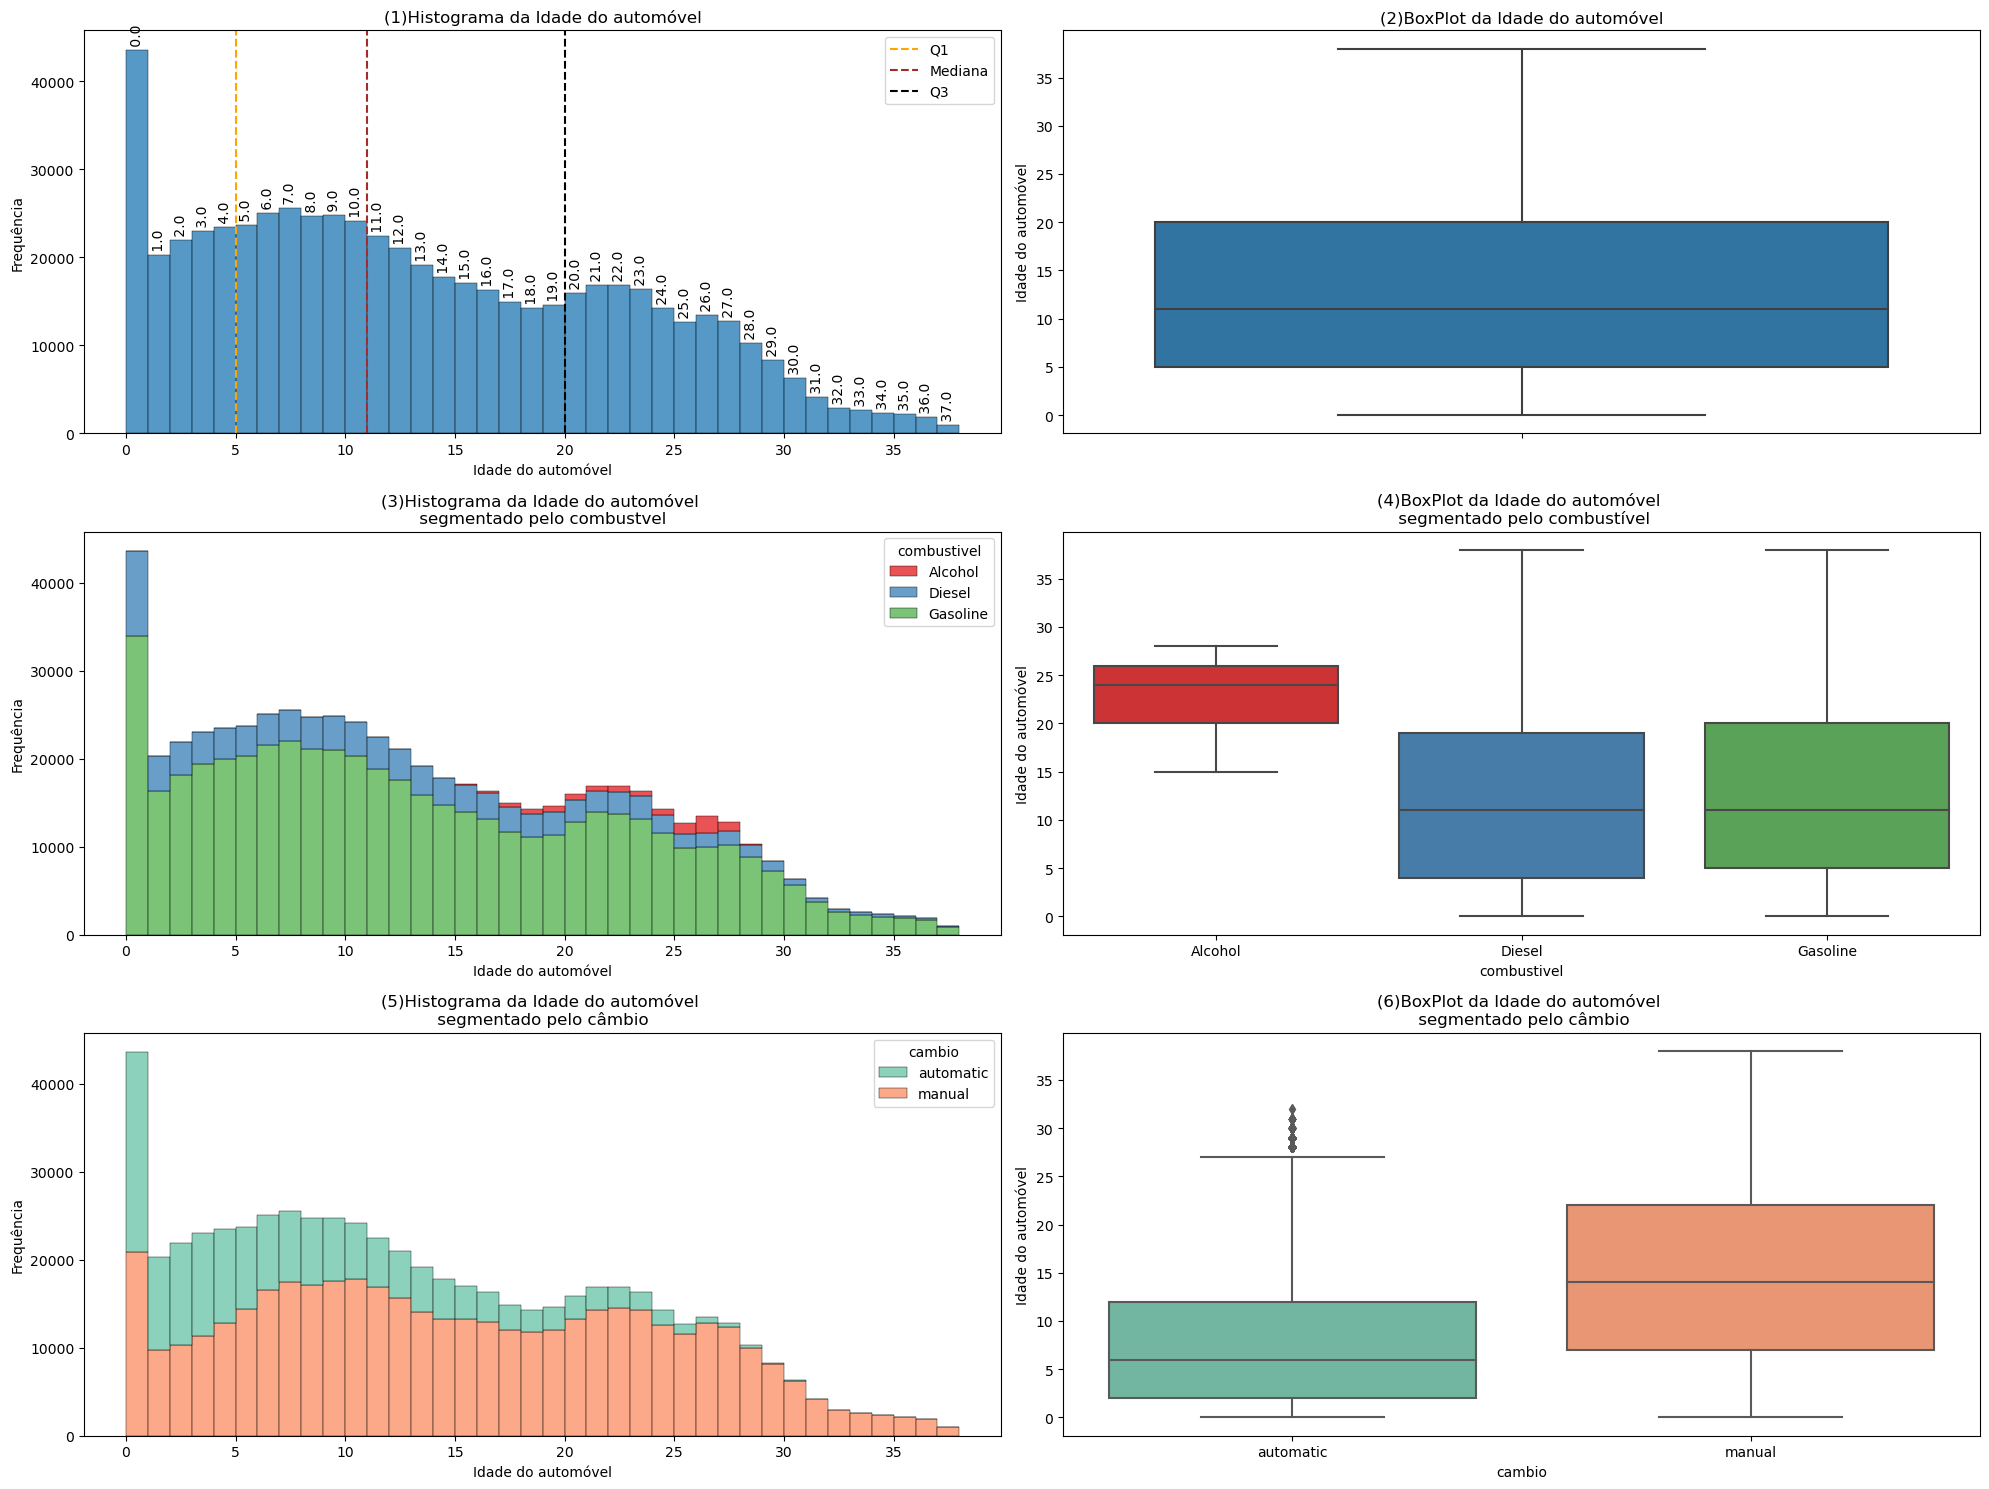

In [42]:
# Criação dos Grids 3x2
janela, graficos = plt.subplots(nrows=3, ncols=2, figsize=(20,15))

quartil_25 = np.percentile(df_FIPE_carros['Idade_do_automovel'], 25)
quartil_50 = np.percentile(df_FIPE_carros['Idade_do_automovel'], 50)
quartil_75 = np.percentile(df_FIPE_carros['Idade_do_automovel'], 75)
print(f'Q1 equivale a: {quartil_25}')
print(f'A mediana é: {quartil_50}')
print(f'Q3 equivale a: {quartil_75}')

# Gráfico 1
#-----------
# Criação do gráfico 1
sns.histplot(data=df_FIPE_carros, x='Idade_do_automovel', binwidth=1, ax=graficos[0][0], edgecolor="black", linewidth=0.3)

cria_intervalo_rotulos_histograma(coordenadas=graficos[0][0], arredondamento_limite_superior=0, apenas_intervalo_minimo=True)

# Customizações adicionais do gráfico 1
graficos[0][0].set_title('(1)Histograma da Idade do automóvel', fontsize=12)
graficos[0][0].set_xlabel('Idade do automóvel', fontsize=10)
graficos[0][0].set_ylabel('Frequência', fontsize=10)
graficos[0][0].axvline(quartil_25, color='orange', linestyle='dashed', linewidth=1.5, label='Q1')
graficos[0][0].axvline(quartil_50, color='brown', linestyle='dashed', linewidth=1.5, label='Mediana')
graficos[0][0].axvline(quartil_75, color='black', linestyle='dashed', linewidth=1.5, label='Q3')
graficos[0][0].legend()
#-----------

# Gráfico 2
#-----------
# Criação do gráfico 2
sns.boxplot(data=df_FIPE_carros, y='Idade_do_automovel', ax=graficos[0][1])

# Customizações adicionais do gráfico 2
graficos[0][1].set_title('(2)BoxPlot da Idade do automóvel', fontsize=12)
graficos[0][1].set_ylabel('Idade do automóvel', fontsize=10)
#-----------

# Gráfico 3
#-----------
# Criação do gráfico 3
sns.histplot(data=df_FIPE_carros, x='Idade_do_automovel', hue='combustivel', binwidth=1,  multiple="stack", ax=graficos[1][0], edgecolor="black", linewidth=0.3, palette='Set1')

# Customizações adicionais do gráfico 1
graficos[1][0].set_title('(3)Histograma da Idade do automóvel \n segmentado pelo combustvel ', fontsize=12)
graficos[1][0].set_xlabel('Idade do automóvel', fontsize=10)
graficos[1][0].set_ylabel('Frequência', fontsize=10)
#-----------

# Gráfico 4
#-----------
# Criação do gráfico 4
sns.boxplot(data=df_FIPE_carros, y='Idade_do_automovel', x='combustivel', ax=graficos[1][1], palette='Set1')

# Customizações adicionais do gráfico 4
graficos[1][1].set_title('(4)BoxPlot da Idade do automóvel \n segmentado pelo combustível', fontsize=12)
graficos[1][1].set_ylabel('Idade do automóvel', fontsize=10)
#------------

# Gráfico 5
#-----------
# Criação do gráfico 5
sns.histplot(data=df_FIPE_carros, x='Idade_do_automovel', hue='cambio', binwidth=1, multiple="stack", ax=graficos[2][0], edgecolor="black", linewidth=0.3, palette='Set2')

# Customizações adicionais do gráfico 5
graficos[2][0].set_title('(5)Histograma da Idade do automóvel \n segmentado pelo câmbio ', fontsize=12)
graficos[2][0].set_xlabel('Idade do automóvel', fontsize=10)
graficos[2][0].set_ylabel('Frequência', fontsize=10)
#-----------

# Gráfico 6
#-----------
# Criação do gráfico 6
sns.boxplot(data=df_FIPE_carros, y='Idade_do_automovel', x='cambio', ax=graficos[2][1], palette='Set2')

# Customizações adicionais do gráfico 6
graficos[2][1].set_title('(6)BoxPlot da Idade do automóvel \n segmentado pelo câmbio', fontsize=12)
graficos[2][1].set_ylabel('Idade do automóvel', fontsize=10)
#------------

# Exibir os gráficos
plt.tight_layout()
plt.show()

**Conclusão:** Observando o 1º gráfico, podemos ver que a maior frequência de carros na amostra correspondem aos de 0 anos de idade, ou seja, os modelos novos. O atributo idade do automóvel possui menor variabilidade do que a potência do motor analisada anteriormente, e não apresenta nenhum outlier. Observando a segmentação pelo tipo de combustível, a gasolina continua predominante, seguida pelo diesel, e por último o álcool. Nota-se também que o álcool está presente apenas em automóveis mais velhos, entre 16 e 29 anos, apresentando assim menor variabilidade em relação aos demais tipos de combustíveis. A gasolina e o diesel possuem variabilidade bastante semelhante, distribuindo-se por toda a amostra. Quanto ao tipo de câmbio, o manual é predominante, porém o tipo automático não está muito atrás. Este último apresenta menor variabilidade, porém contém alguns outliers acima do limite superior.  

Atributo: ``preco_medio_FIPE``

Text(0.5, 1.0, 'Box Plot do Preço Médio \n dos automóveis')

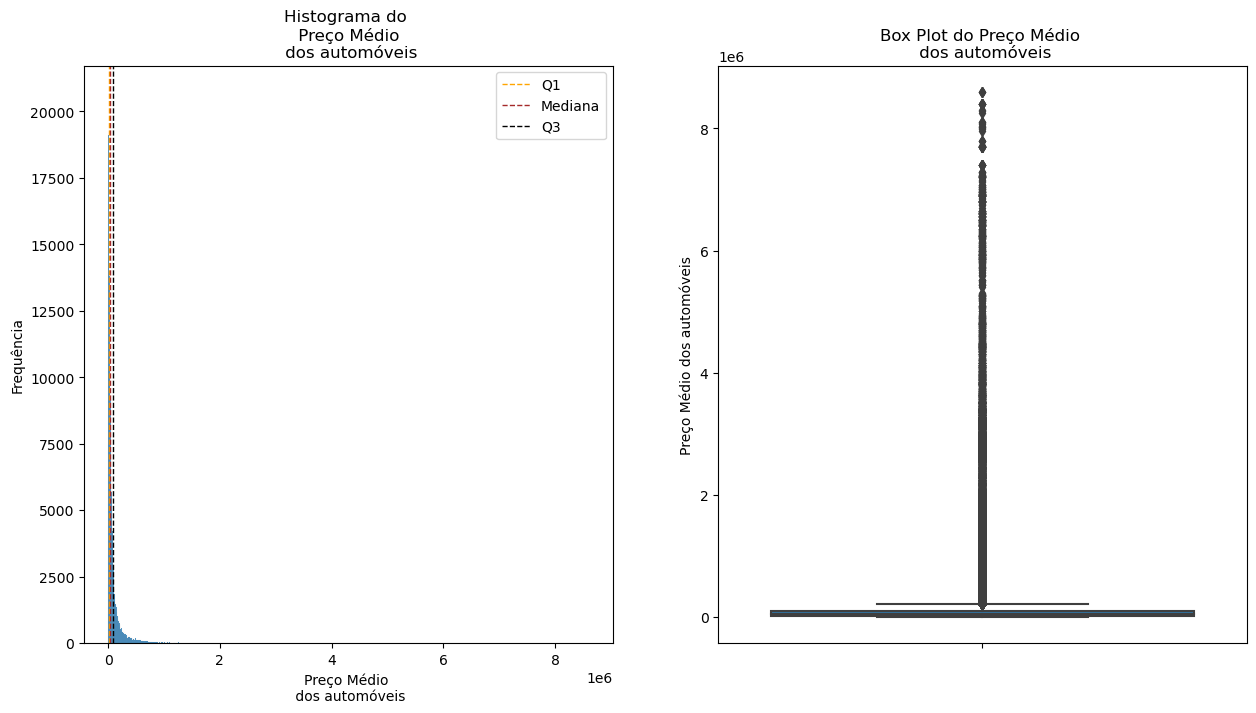

In [11]:
janela, graficos = plt.subplots(nrows=1, ncols=2, figsize=(15,7.5))

quartil_25 = np.percentile(df_FIPE_carros['preco_medio_FIPE'], 25)
quartil_50 = np.percentile(df_FIPE_carros['preco_medio_FIPE'], 50)
quartil_75 = np.percentile(df_FIPE_carros['preco_medio_FIPE'], 75)

# Gráfico 1
#-----------
# Criação do gráfico 1
sns.histplot(data=df_FIPE_carros, x='preco_medio_FIPE', ax=graficos[0])

# Customizações adicionais do gráfico 1
graficos[0].set_xlabel('Preço Médio \n dos automóveis', fontsize=10)
graficos[0].set_ylabel('Frequência', fontsize=10)
graficos[0].set_title('Histograma do \n Preço Médio \n dos automóveis', fontsize=12)
graficos[0].axvline(quartil_25, color='orange', linestyle='dashed', linewidth=1, label='Q1')
graficos[0].axvline(quartil_50, color='brown', linestyle='dashed', linewidth=1, label='Mediana')
graficos[0].axvline(quartil_75, color='black', linestyle='dashed', linewidth=1, label='Q3')
graficos[0].legend()
#-----------

# Gráfico 2
#-----------
# Criação do gráfico 2
sns.boxplot(data=df_FIPE_carros, y='preco_medio_FIPE', ax=graficos[1])

# Customizações adicionais do gráfico 2
graficos[1].set_ylabel('Preço Médio dos automóveis', fontsize=10)
graficos[1].set_title('Box Plot do Preço Médio \n dos automóveis', fontsize=12)

**Conclusão:** Podemos observar que o atributo ``preco_medio_FIPE`` contém um número muito grande de outliers. Essa quantidade elevada, além de dificultar nossa análise, pode enviesar a tomada de decisões e prejudicar possíveis insights. Diante disso, tomei a liberdade de realizar um tratamento verificando todos os valores que estão fora dos limites superior e inferior. Esses outliers serão excluídos, e o restante será mantido em um novo DataFrame chamado ``df_FIPE_carros_sem_outliers``. Utilizarei esse novo DataFrame apenas para os gráficos apresentados a seguir nesta seção.

In [12]:
# Calculando os quartis
q1 = np.percentile(df_FIPE_carros['preco_medio_FIPE'], 25) # 1º Quartil
q3 = np.percentile(df_FIPE_carros['preco_medio_FIPE'], 75) # 3º Quartil

# Calculando o IQR (Intervalo Interquartil)
iqr = q3 - q1

# Definir os limites superior e inferior para detectar outliers
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Criar um novo DataFrame sem os outliers
df_FIPE_carros_sem_outliers = df_FIPE_carros[(df_FIPE_carros['preco_medio_FIPE'] >= limite_inferior) & (df_FIPE_carros['preco_medio_FIPE'] <= limite_superior)]

print(f'Amostra com os outliers: {df_FIPE_carros.shape[0]} linhas')
print(f'Amostra sem os outliers: {df_FIPE_carros_sem_outliers.shape[0]} linhas')
print(f'Foram excluídas ao todo: {df_FIPE_carros.shape[0] - df_FIPE_carros_sem_outliers.shape[0]} linhas')

Amostra com os outliers: 599004 linhas
Amostra sem os outliers: 532429 linhas
Foram excluídas ao todo: 66575 linhas


Q1 equivale a: 18201.0
A mediana é: 36776.0
Q3 equivale a: 72253.0


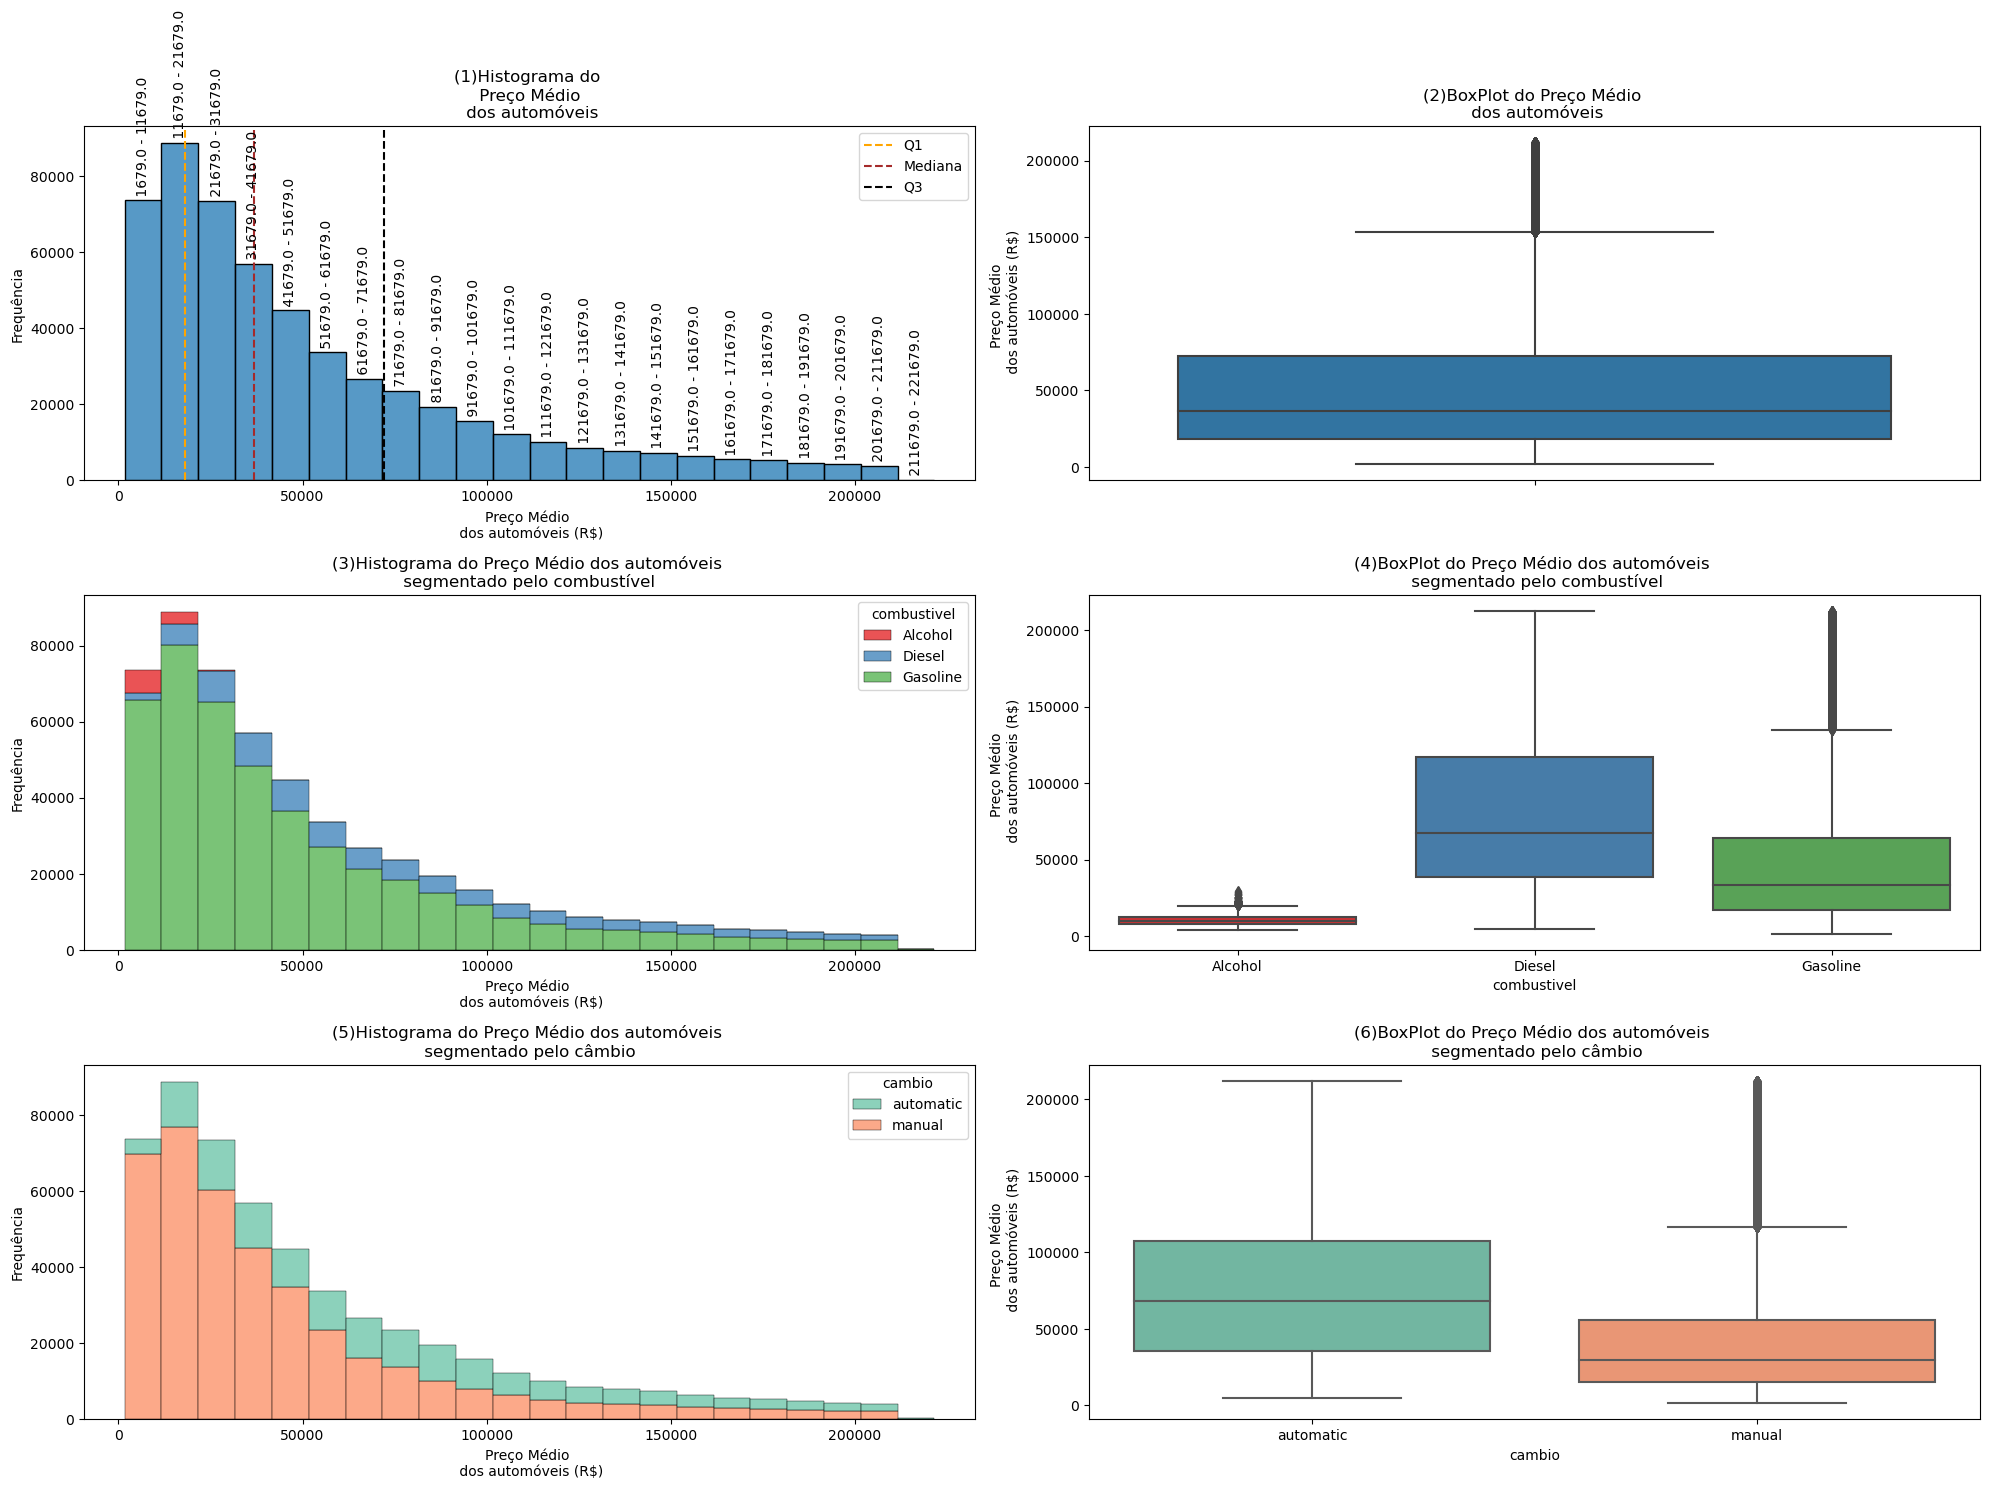

In [14]:
# Criação dos Grids 3x2
janela, graficos = plt.subplots(nrows=3, ncols=2, figsize=(20,15))

quartil_25 = np.percentile(df_FIPE_carros_sem_outliers['preco_medio_FIPE'], 25)
quartil_50 = np.percentile(df_FIPE_carros_sem_outliers['preco_medio_FIPE'], 50)
quartil_75 = np.percentile(df_FIPE_carros_sem_outliers['preco_medio_FIPE'], 75)
print(f'Q1 equivale a: {quartil_25}')
print(f'A mediana é: {quartil_50}')
print(f'Q3 equivale a: {quartil_75}')

# Gráfico 1
#-----------
# Criação do gráfico 1
sns.histplot(data=df_FIPE_carros_sem_outliers, x='preco_medio_FIPE', binwidth=10000, ax=graficos[0][0])

cria_intervalo_rotulos_histograma(coordenadas=graficos[0][0], arredondamento_limite_superior=2, apenas_intervalo_minimo=False)

# Customizações adicionais do gráfico 1
graficos[0][0].set_title('(1)Histograma do \n Preço Médio \n dos automóveis', fontsize=12)
graficos[0][0].set_xlabel('Preço Médio \n dos automóveis (R$)', fontsize=10)
graficos[0][0].set_ylabel('Frequência', fontsize=10)
graficos[0][0].axvline(quartil_25, color='orange', linestyle='dashed', linewidth=1.5, label='Q1')
graficos[0][0].axvline(quartil_50, color='brown', linestyle='dashed', linewidth=1.5, label='Mediana')
graficos[0][0].axvline(quartil_75, color='black', linestyle='dashed', linewidth=1.5, label='Q3')
graficos[0][0].legend()
#-----------

# Gráfico 2
#-----------
# Criação do gráfico 2
sns.boxplot(data=df_FIPE_carros_sem_outliers, y='preco_medio_FIPE', ax=graficos[0][1])

# Customizações adicionais do gráfico 2
graficos[0][1].set_title('(2)BoxPlot do Preço Médio \n dos automóveis', fontsize=12)
graficos[0][1].set_ylabel('Preço Médio \n dos automóveis (R$)', fontsize=10)


# Gráfico 3
#-----------
# Criação do gráfico 3
sns.histplot(data=df_FIPE_carros_sem_outliers, x='preco_medio_FIPE', hue='combustivel', binwidth=10000,  multiple="stack", ax=graficos[1][0], edgecolor="black", linewidth=0.3, palette='Set1')

# Customizações adicionais do gráfico 1
graficos[1][0].set_title('(3)Histograma do Preço Médio dos automóveis \n segmentado pelo combustível ', fontsize=12)
graficos[1][0].set_xlabel('Preço Médio \n dos automóveis (R$)', fontsize=10)
graficos[1][0].set_ylabel('Frequência', fontsize=10)
#-----------

# Gráfico 4
#-----------
# Criação do gráfico 4
sns.boxplot(data=df_FIPE_carros_sem_outliers, y='preco_medio_FIPE', x='combustivel', ax=graficos[1][1], palette='Set1')

# Customizações adicionais do gráfico 4
graficos[1][1].set_title('(4)BoxPlot do Preço Médio dos automóveis \n segmentado pelo combustível', fontsize=12)
graficos[1][1].set_ylabel('Preço Médio \n dos automóveis (R$)', fontsize=10)
#------------

# Gráfico 5
#-----------
# Criação do gráfico 5
sns.histplot(data=df_FIPE_carros_sem_outliers, x='preco_medio_FIPE', hue='cambio',  binwidth=10000, multiple="stack", ax=graficos[2][0], edgecolor="black", linewidth=0.3, palette='Set2')

# Customizações adicionais do gráfico 5
graficos[2][0].set_title('(5)Histograma do Preço Médio dos automóveis \n segmentado pelo câmbio ', fontsize=12)
graficos[2][0].set_xlabel('Preço Médio \n dos automóveis (R$)', fontsize=10)
graficos[2][0].set_ylabel('Frequência', fontsize=10)
#-----------

# Gráfico 6
#-----------
# Criação do gráfico 6
sns.boxplot(data=df_FIPE_carros_sem_outliers, y='preco_medio_FIPE', x='cambio', ax=graficos[2][1], palette='Set2')

# Customizações adicionais do gráfico 4
graficos[2][1].set_title('(6)BoxPlot do Preço Médio dos automóveis \n segmentado pelo câmbio', fontsize=12)
graficos[2][1].set_ylabel('Preço Médio \n dos automóveis (R$)', fontsize=10)
#------------

# Exibir os gráficos
plt.tight_layout()
plt.show()

**Conclusão:** Após a exclusão dos outliers, ficamos com as informações da média de preços da tabela FIPE até o valor máximo de R$ 221.679, cada uma das barras do histograma foi dividida em fatias de 10.000 reais. Podemos observar que o intervalo com maior frequência corresponde aos veículos com preço médio entre R$ 11.679 e R$ 21.678,99. Assim como o atributo potência do motor, o 1º gráfico do preço médio apresenta uma distribuição assimétrica à direita, ou seja, a maior concentração dos dados está à esquerda do gráfico. Mesmo após o tratamento dos outliers, notamos que essa amostra ainda possui outliers, e os dados apresentam uma grande variabilidade, conforme observado no gráfico 2. Analisando as segmentações por combustível, notamos que o álcool está presente apenas em veículos com valor médio inferior a R$ 35.000, indicando uma pequena variabilidade. O diesel é o único combustível que não apresenta outliers, além de possuir a maior variabilidade entre os demais. A gasolina, por outro lado, apresenta menor variabilidade, mas um grande número de outliers. Ao observar a segmentação pelo tipo de câmbio, notamos que o tipo manual é predominante em relação aos veículos automáticos. No entanto, estes últimos apresentam maior variabilidade, enquanto os carros manuais possuem vários outliers.

### III. Explorando os atributos categóricos

Nossas colunas categóricas possúem uma variedade de valores únicos, o atributo ``marca`` por exemplo possui 87 valores únicos, e o ``modelo`` possuém 6171 valores únicos... Diante disso farei uma análise apenas das 20 maiores categorias analisadas.

In [46]:
df_FIPE_carros.describe(include='category')

,mes_de_referencia,marca,modelo,combustivel,cambio
count,599004,599004,599004,599004,599004
unique,12,87,6171,3,2
top,January,VW - VolksWagen,Buggy/M-8/M-8 Long 1.6,Gasoline,manual
freq,71823,58386,898,493499,435063


Com base nessa descição acima conseguimos extrair algumas informações além da frequência de valores únicos, como a moda(top), que é o valor que mais se repete. O atributo ``marca`` por exemplo apresenta como moda o registro VW - VolksWagen, aparecendo 58.386 vezes, o que representa 9.7% de toda a amostra! E o atributo ``modelo`` tem como moda o carro Buggy/M-8/M-8 Long 1.6, aparecendo 898 vezes o que representa 0.14% de toda a amostra. A gasolina é o combustível mais frequente e o no atributo cambio o registro manual é o que mais se repete.

Atributo: ``combustivel`` e ``cambio``

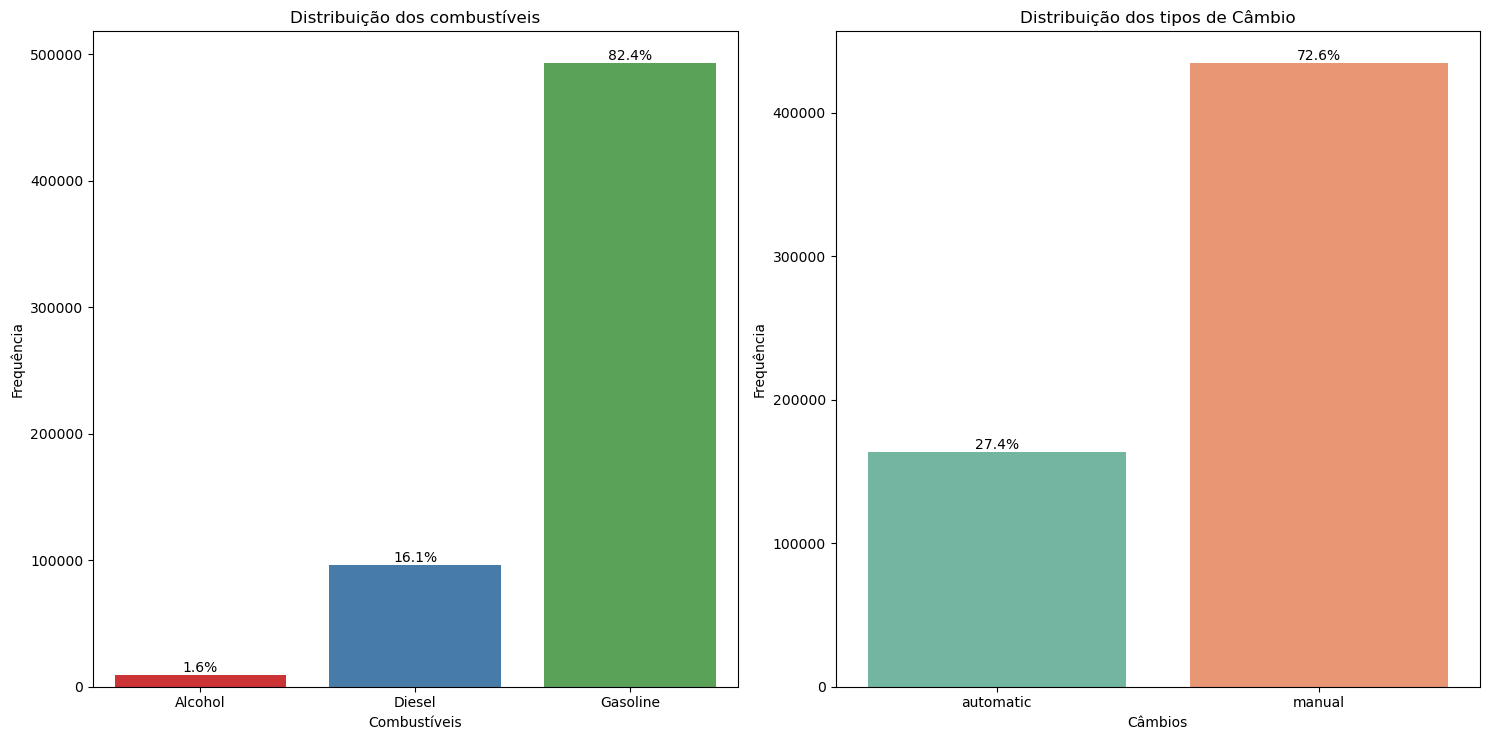

In [47]:
# Criação dos Grids 3x1
janela, graficos = plt.subplots(nrows=1, ncols=2, figsize=(15,7.5))

# Gráfico de distribuição dos combustíveis
combustivel_plot = sns.countplot(data=df_FIPE_carros, x='combustivel', ax=graficos[0], palette='Set1')

# Alterar os rótulos dos eixos para o gráfico 1
graficos[0].set_title('Distribuição dos combustíveis', fontsize=12)    # Título
graficos[0].set_xlabel('Combustíveis', fontsize=10)  # Eixo X
graficos[0].set_ylabel('Frequência', fontsize=10)  # Eixo Y

plota_percentual(grafico=combustivel_plot, DataFrame=df_FIPE_carros, coluna='combustivel')

cambio_plot = sns.countplot(data=df_FIPE_carros, x='cambio', ax=graficos[1], palette='Set2')

# Alterar os rótulos dos eixos para o gráfico 2
graficos[1].set_title('Distribuição dos tipos de Câmbio', fontsize=12)    # Título
graficos[1].set_xlabel('Câmbios', fontsize=10)  # Eixo X
graficos[1].set_ylabel('Frequência', fontsize=10)  # Eixo Y

plota_percentual(grafico=cambio_plot,DataFrame=df_FIPE_carros, coluna='cambio')

# Exibir os gráficos
plt.tight_layout()
plt.show()

**Conclusão:** Assim como foi demonstrado através de outras análises a gasolina é a moda, com 82,4% de todos os carros analisados, seguido do Diesel e do Álcool. O Câmbio manual ocupa pouco menos de 3/4 do mercado.

Atributo: ``marca``

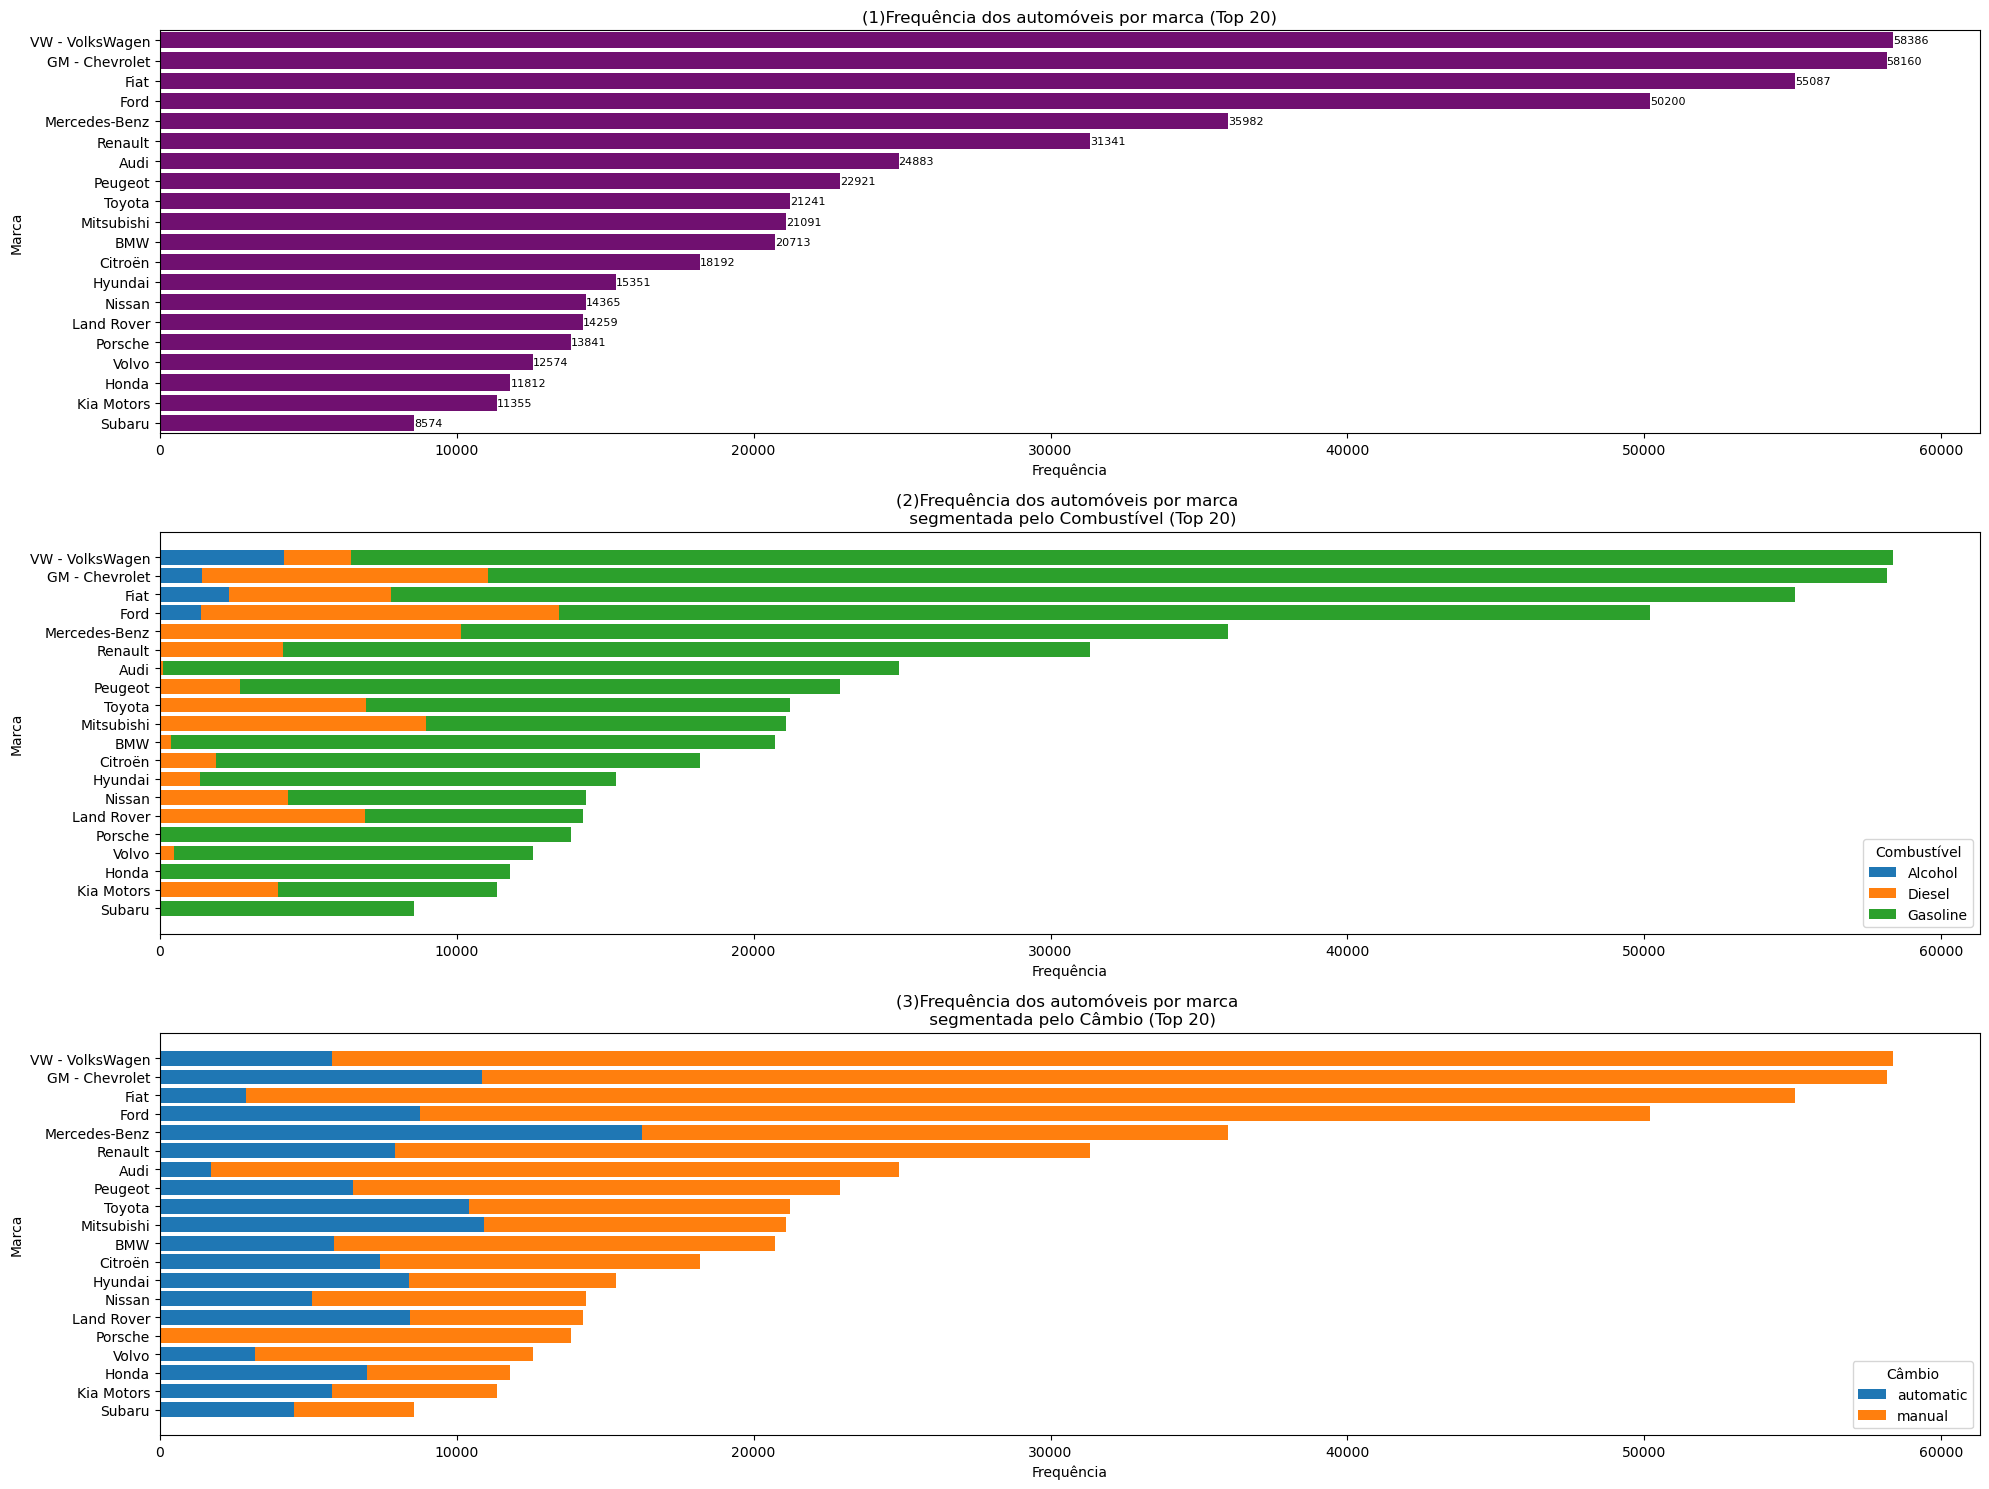

In [48]:
# Criação dos Grids 3x1
janela, graficos = plt.subplots(nrows=3, ncols=1, figsize=(20,15))

carros_por_marca = (
    df_FIPE_carros.groupby('marca')['marca']
    .count()
    .sort_values(ascending=False)
    .reset_index(name='Frequência')
    .head(20)
)

fig = sns.barplot(
    data=carros_por_marca,
    y="marca",
    x="Frequência",
    color="purple",
    order= carros_por_marca['marca'],
    ax=graficos[0]
)

# Customizações adicionais do gráfico 1
graficos[0].set_title("(1)Frequência dos automóveis por marca (Top 20)", fontsize=12)
graficos[0].set_xlabel("Frequência", fontsize=10)
graficos[0].set_ylabel("Marca", fontsize=10)
graficos[0].bar_label(fig.containers[0], fontsize=8)
#-----------------------------------------------------

contagem = pd.crosstab(df_FIPE_carros['marca'], df_FIPE_carros['combustivel'])
contagem['frequencia'] = contagem['Alcohol'] + contagem['Diesel'] + contagem['Gasoline']
contagem = contagem.sort_values(by='frequencia', ascending=False).head(20).drop(columns='frequencia')

# Inicializando a variável bottom (ponto de início da barra) como zeros
bottom = None

# Iterando sobre cada tipo de combustível para empilhar as barras
for i, combustivel in enumerate(contagem.columns):
    if bottom is None:
        # Primeira barra, não precisa de bottom
        graficos[1].barh(contagem.index[::-1], contagem[combustivel][::-1], label=combustivel)
        bottom = contagem[combustivel][::-1]
    else:
        # Empilha as barras com o parâmetro bottom
        graficos[1].barh(contagem.index[::-1], contagem[combustivel][::-1], left=bottom, label=combustivel)
        bottom += contagem[combustivel][::-1]

# Customizações adicionais do gráfico 2
graficos[1].set_title("(2)Frequência dos automóveis por marca \n segmentada pelo Combustível (Top 20)", fontsize=12)
graficos[1].set_xlabel("Frequência", fontsize=10)
graficos[1].set_ylabel("Marca", fontsize=10)
graficos[1].legend(title="Combustível")
#-----------------------------------------------------

# Contagem de frequência da variável categórica 'marca' segmentada por 'cambio'
contagem = pd.crosstab(df_FIPE_carros['marca'], df_FIPE_carros['cambio'])
contagem['frequencia'] = contagem['automatic'] + contagem['manual']
contagem = contagem.sort_values(by='frequencia', ascending=False).head(20).drop(columns='frequencia')

# Inicializando a variável bottom (ponto de início da barra) como zeros
bottom = None

# Iterando sobre cada tipo de câmbio para empilhar as barras
#
for i, cambio in enumerate(contagem.columns):
    if bottom is None:
        # Primeira barra, não precisa de bottom
        graficos[2].barh(contagem.index[::-1], contagem[cambio][::-1], label=cambio)
        bottom = contagem[cambio][::-1]
    else:
        # Empilha as barras com o parâmetro bottom
        graficos[2].barh(contagem.index[::-1], contagem[cambio][::-1], left=bottom, label=cambio)
        bottom += contagem[cambio][::-1]

# Customizações adicionais do gráfico 3
graficos[2].set_title("(3)Frequência dos automóveis por marca \n segmentada pelo Câmbio (Top 20)", fontsize=12)
graficos[2].set_xlabel("Frequência", fontsize=10)
graficos[2].set_ylabel("Marca", fontsize=10)
graficos[2].legend(title="Câmbio")
#-----------------------------------------------------

# Exibir os gráficos
plt.tight_layout()
plt.show()

**Conclusão:** Ao analisar a frequência de automóveis por marca, observamos que a VW - Volkswagen lidera o ranking, seguida de perto pela GM - Chevrolet. Além disso, notamos a predominância de veículos movidos a gasolina, com algumas marcas, como a Porsche, possuindo toda a sua frota composta exclusivamente por carros a gasolina. Em relação aos tipos de câmbio, os veículos com câmbio manual são predominantes nessas marcas. Em particular, a Porsche se destaca novamente, tendo todos os seus carros equipados com câmbio manual.

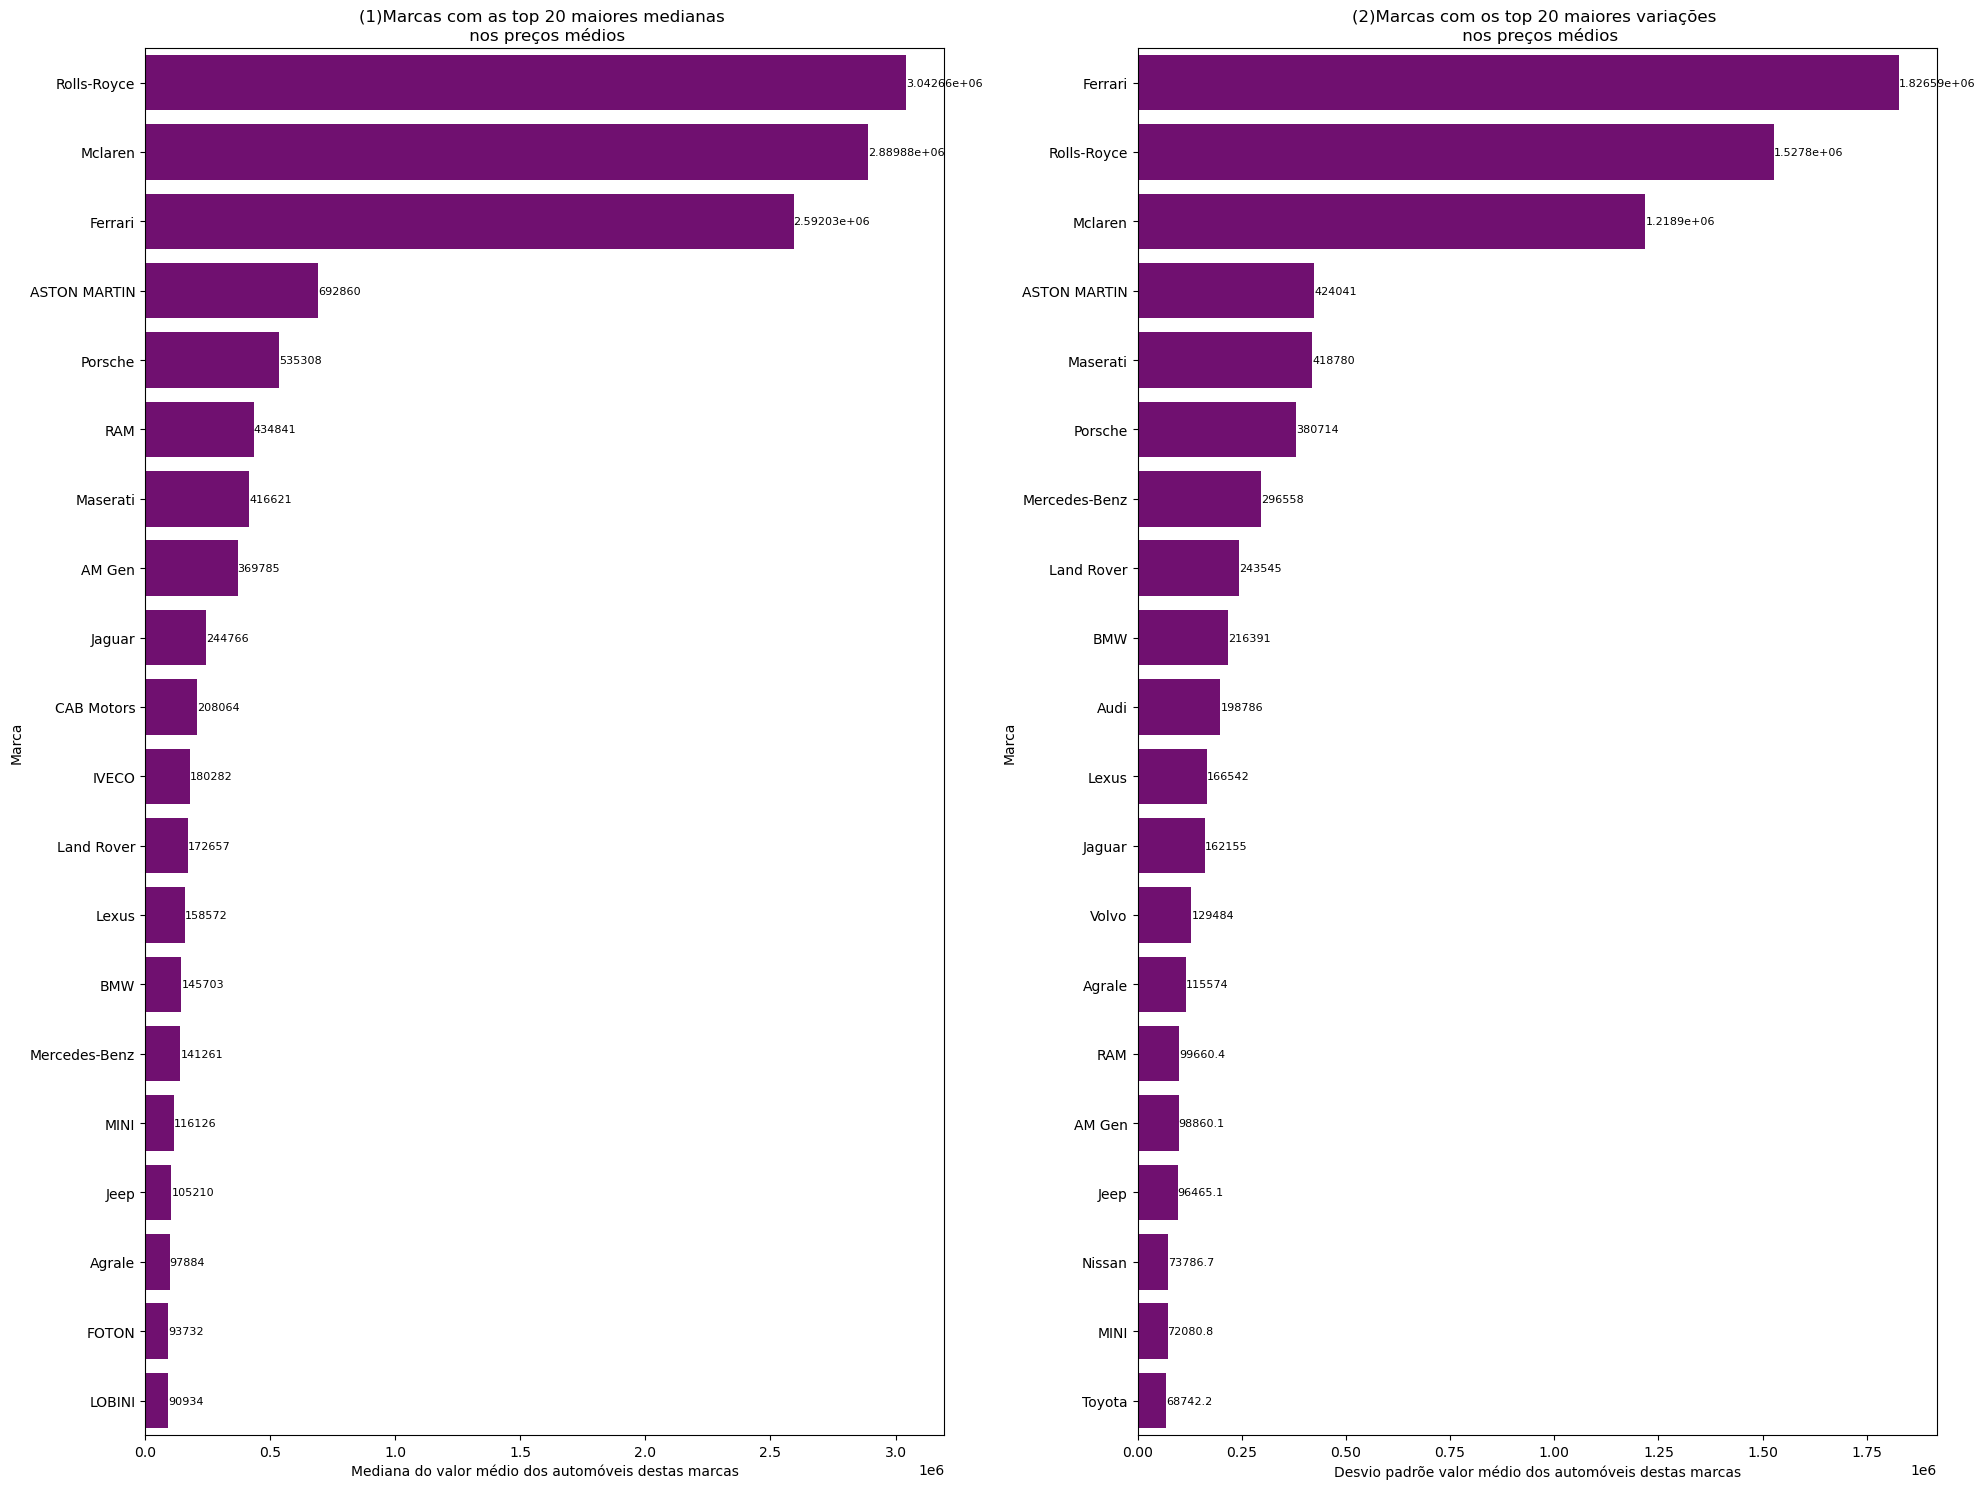

In [49]:
carros_pela_mediana = round((
    df_FIPE_carros.groupby('marca')['preco_medio_FIPE']
    .median()
    .sort_values(ascending=False)
    .reset_index(name='mediana_preco_medio')
    .head(20)
), 2)

carros_por_desvio_padrao = round((
    df_FIPE_carros.groupby('marca')['preco_medio_FIPE']
    .std()
    .sort_values(ascending=False)
    .reset_index(name='desvio_padrao_preco_medio')
    .head(20)
), 2)

# Criando os grids 1x2
janela, graficos = plt.subplots(nrows=1, ncols=2, figsize=(20,15))

# Criando o gráfico 1
fig = sns.barplot(
    data=carros_pela_mediana,
    y="marca",
    x="mediana_preco_medio",
    color="purple",
    order= carros_pela_mediana['marca'],
    ax=graficos[0]
)

# Customizações adicionais do gráfico 1
graficos[0].set_title("(1)Marcas com as top 20 maiores medianas \n nos preços médios", fontsize=12)
graficos[0].set_xlabel("Mediana do valor médio dos automóveis destas marcas")
graficos[0].set_ylabel("Marca")
graficos[0].bar_label(fig.containers[0], fontsize=8)
#------------------------

# Criando o gráfico 2
fig = sns.barplot(
    data=carros_por_desvio_padrao,
    y="marca",
    x="desvio_padrao_preco_medio",
    color="purple",
    order= carros_por_desvio_padrao['marca'],
    ax=graficos[1]
)

# Customizações adicionais do gráfico 2
graficos[1].set_title("(2)Marcas com os top 20 maiores variações \n nos preços médios", fontsize=12)
graficos[1].set_xlabel("Desvio padrõe valor médio dos automóveis destas marcas")
graficos[1].set_ylabel("Marca")
graficos[1].bar_label(fig.containers[0], fontsize=8)

# Exibir os gráficos
plt.tight_layout()
plt.show()

**Conclusão:** Analisando as marcas com as maiores medianas e maiores desvios padrões de preço, observamos uma correlação interessante. Rolls-Royce, McLaren e Ferrari ocupam as três primeiras posições em ambos os rankings, indicando que essas marcas possuem, além dos preços medianos mais altos, uma maior variação nos preços de seus veículos. A Aston Martin aparece em 4º lugar, com uma diferença significativa em relação às três primeiras colocadas. Isso sugere que a frota de veículos dessas marcas, além de ser composta por modelos de alto valor, apresenta uma ampla dispersão de preços, refletindo na sua diversidade de suas ofertas.

Atributo: ``modelo``

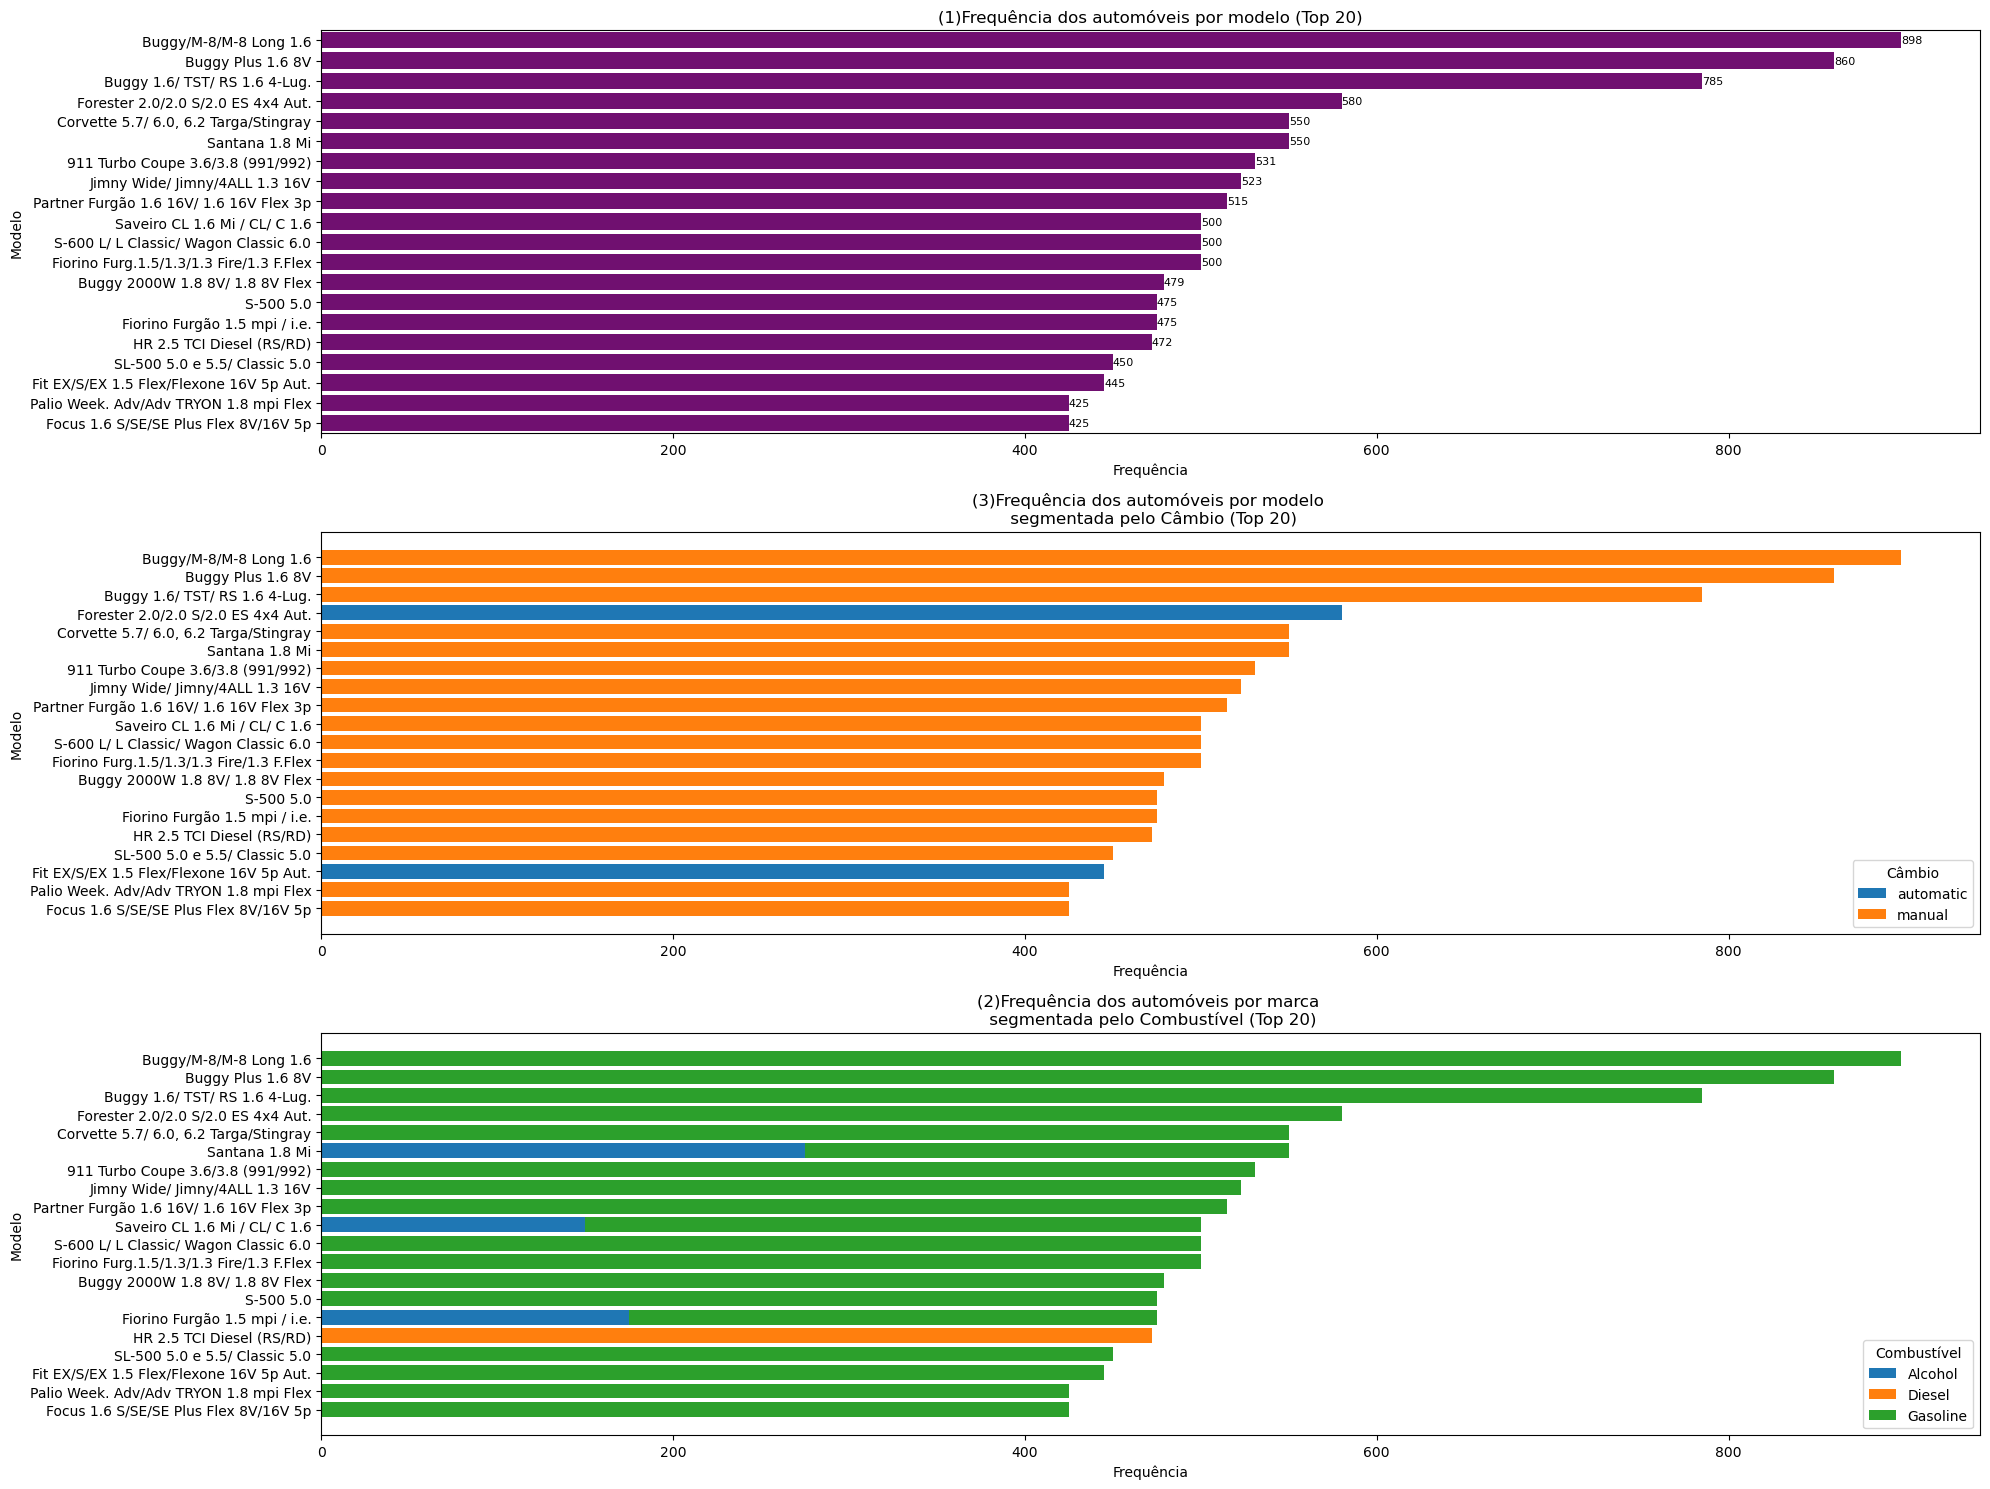

In [50]:
# Criando os grids 3x1
janela, graficos = plt.subplots(nrows=3, ncols=1, figsize=(20,15))

carros_por_marca = (
    df_FIPE_carros.groupby('modelo')['modelo']
    .count()
    .sort_values(ascending=False)
    .reset_index(name='Frequência')
    .head(20)
)

fig = sns.barplot(
    data=carros_por_marca,
    y="modelo",
    x="Frequência",
    color="purple",
    order= carros_por_marca['modelo'],
    ax=graficos[0]
)

# Customizações adicionais do gráfico 1
graficos[0].set_title("(1)Frequência dos automóveis por modelo (Top 20)", fontsize=12)
graficos[0].set_xlabel("Frequência")
graficos[0].set_ylabel("Modelo")
graficos[0].bar_label(fig.containers[0], fontsize=8)
#-----------------------------------------------------

contagem = pd.crosstab(df_FIPE_carros['modelo'], df_FIPE_carros['combustivel'])
contagem['frequencia'] = contagem['Alcohol'] + contagem['Diesel'] + contagem['Gasoline']
contagem = contagem.sort_values(by='frequencia', ascending=False).head(20).drop(columns='frequencia')

# Inicializando a variável bottom (ponto de início da barra) como zeros
bottom = None

# Iterando sobre cada tipo de combustível para empilhar as barras
for i, combustivel in enumerate(contagem.columns):
    if bottom is None:
        # Primeira barra, não precisa de bottom
        graficos[2].barh(contagem.index[::-1], contagem[combustivel][::-1], label=combustivel)
        bottom = contagem[combustivel][::-1]
    else:
        # Empilha as barras com o parâmetro bottom
        graficos[2].barh(contagem.index[::-1], contagem[combustivel][::-1], left=bottom, label=combustivel)
        bottom += contagem[combustivel][::-1]

# Customizações adicionais do gráfico 2
graficos[2].set_title("(2)Frequência dos automóveis por marca \n segmentada pelo Combustível (Top 20)")
graficos[2].set_xlabel("Frequência")
graficos[2].set_ylabel("Modelo")
graficos[2].legend(title="Combustível")
#-------------------------------

contagem = pd.crosstab(df_FIPE_carros['modelo'], df_FIPE_carros['cambio'])
contagem['frequencia'] = contagem['automatic'] + contagem['manual']
contagem = contagem.sort_values(by='frequencia', ascending=False).head(20).drop(columns='frequencia')

# Inicializando a variável bottom (ponto de início da barra) como zeros
bottom = None

# Iterando sobre cada tipo de câmbio para empilhar as barras
for i, cambio in enumerate(contagem.columns):
    if bottom is None:
        # Primeira barra, não precisa de bottom
        graficos[1].barh(contagem.index[::-1], contagem[cambio][::-1], label=cambio)
        bottom = contagem[cambio][::-1]
    else:
        # Empilha as barras com o parâmetro bottom
        graficos[1].barh(contagem.index[::-1], contagem[cambio][::-1], left=bottom, label=cambio)
        bottom += contagem[cambio][::-1]

# Customizações adicionais do gráfico 3
graficos[1].set_title("(3)Frequência dos automóveis por modelo \n segmentada pelo Câmbio (Top 20)")
graficos[1].set_xlabel("Frequência")
graficos[1].set_ylabel("Modelo")
graficos[1].legend(title="Câmbio")
#-------------------------------

# Exibir os gráficos
plt.tight_layout()
plt.show()

Tabela para facilitar o entedimento de qual marca cada automóvel pertence

In [51]:
df_FIPE_carros.groupby('modelo').agg(
    marca=('marca', 'first'),
    frequencia=('modelo', 'count'),
    mediana_dos_precos=('preco_medio_FIPE', 'median')
).sort_values(by='frequencia', ascending=False).reset_index().round(2).head(10)

,modelo,marca,frequencia,mediana_dos_precos
0,Buggy/M-8/M-8 Long 1.6,BRM,898,11743.5
1,Buggy Plus 1.6 8V,Fibravan,860,9922.5
2,Buggy 1.6/ TST/ RS 1.6 4-Lug.,Baby,785,8002.0
3,Forester 2.0/2.0 S/2.0 ES 4x4 Aut.,Subaru,580,39142.5
4,"Corvette 5.7/ 6.0, 6.2 Targa/Stingray",GM - Chevrolet,550,137565.5
5,Santana 1.8 Mi,VW - VolksWagen,550,14008.0
6,911 Turbo Coupe 3.6/3.8 (991/992),Porsche,531,501238.0
7,Jimny Wide/ Jimny/4ALL 1.3 16V,Suzuki,523,55711.0
8,Partner Furgão 1.6 16V/ 1.6 16V Flex 3p,Peugeot,515,29122.0
9,Saveiro CL 1.6 Mi / CL/ C 1.6,VW - VolksWagen,500,12512.0


**Conclusão:** Podemos notar que o pódio dos carros como maiores frequências são compostos por 3 Buggys, todos de marcas diferentes e com um preço médio central(mediana) bem mais baratos se compararmos aos demais veículos, todos constítuídos pelos câmbios manuais e movidos a gasolina, assim como a maior parte dos outros veículos desse ranking.

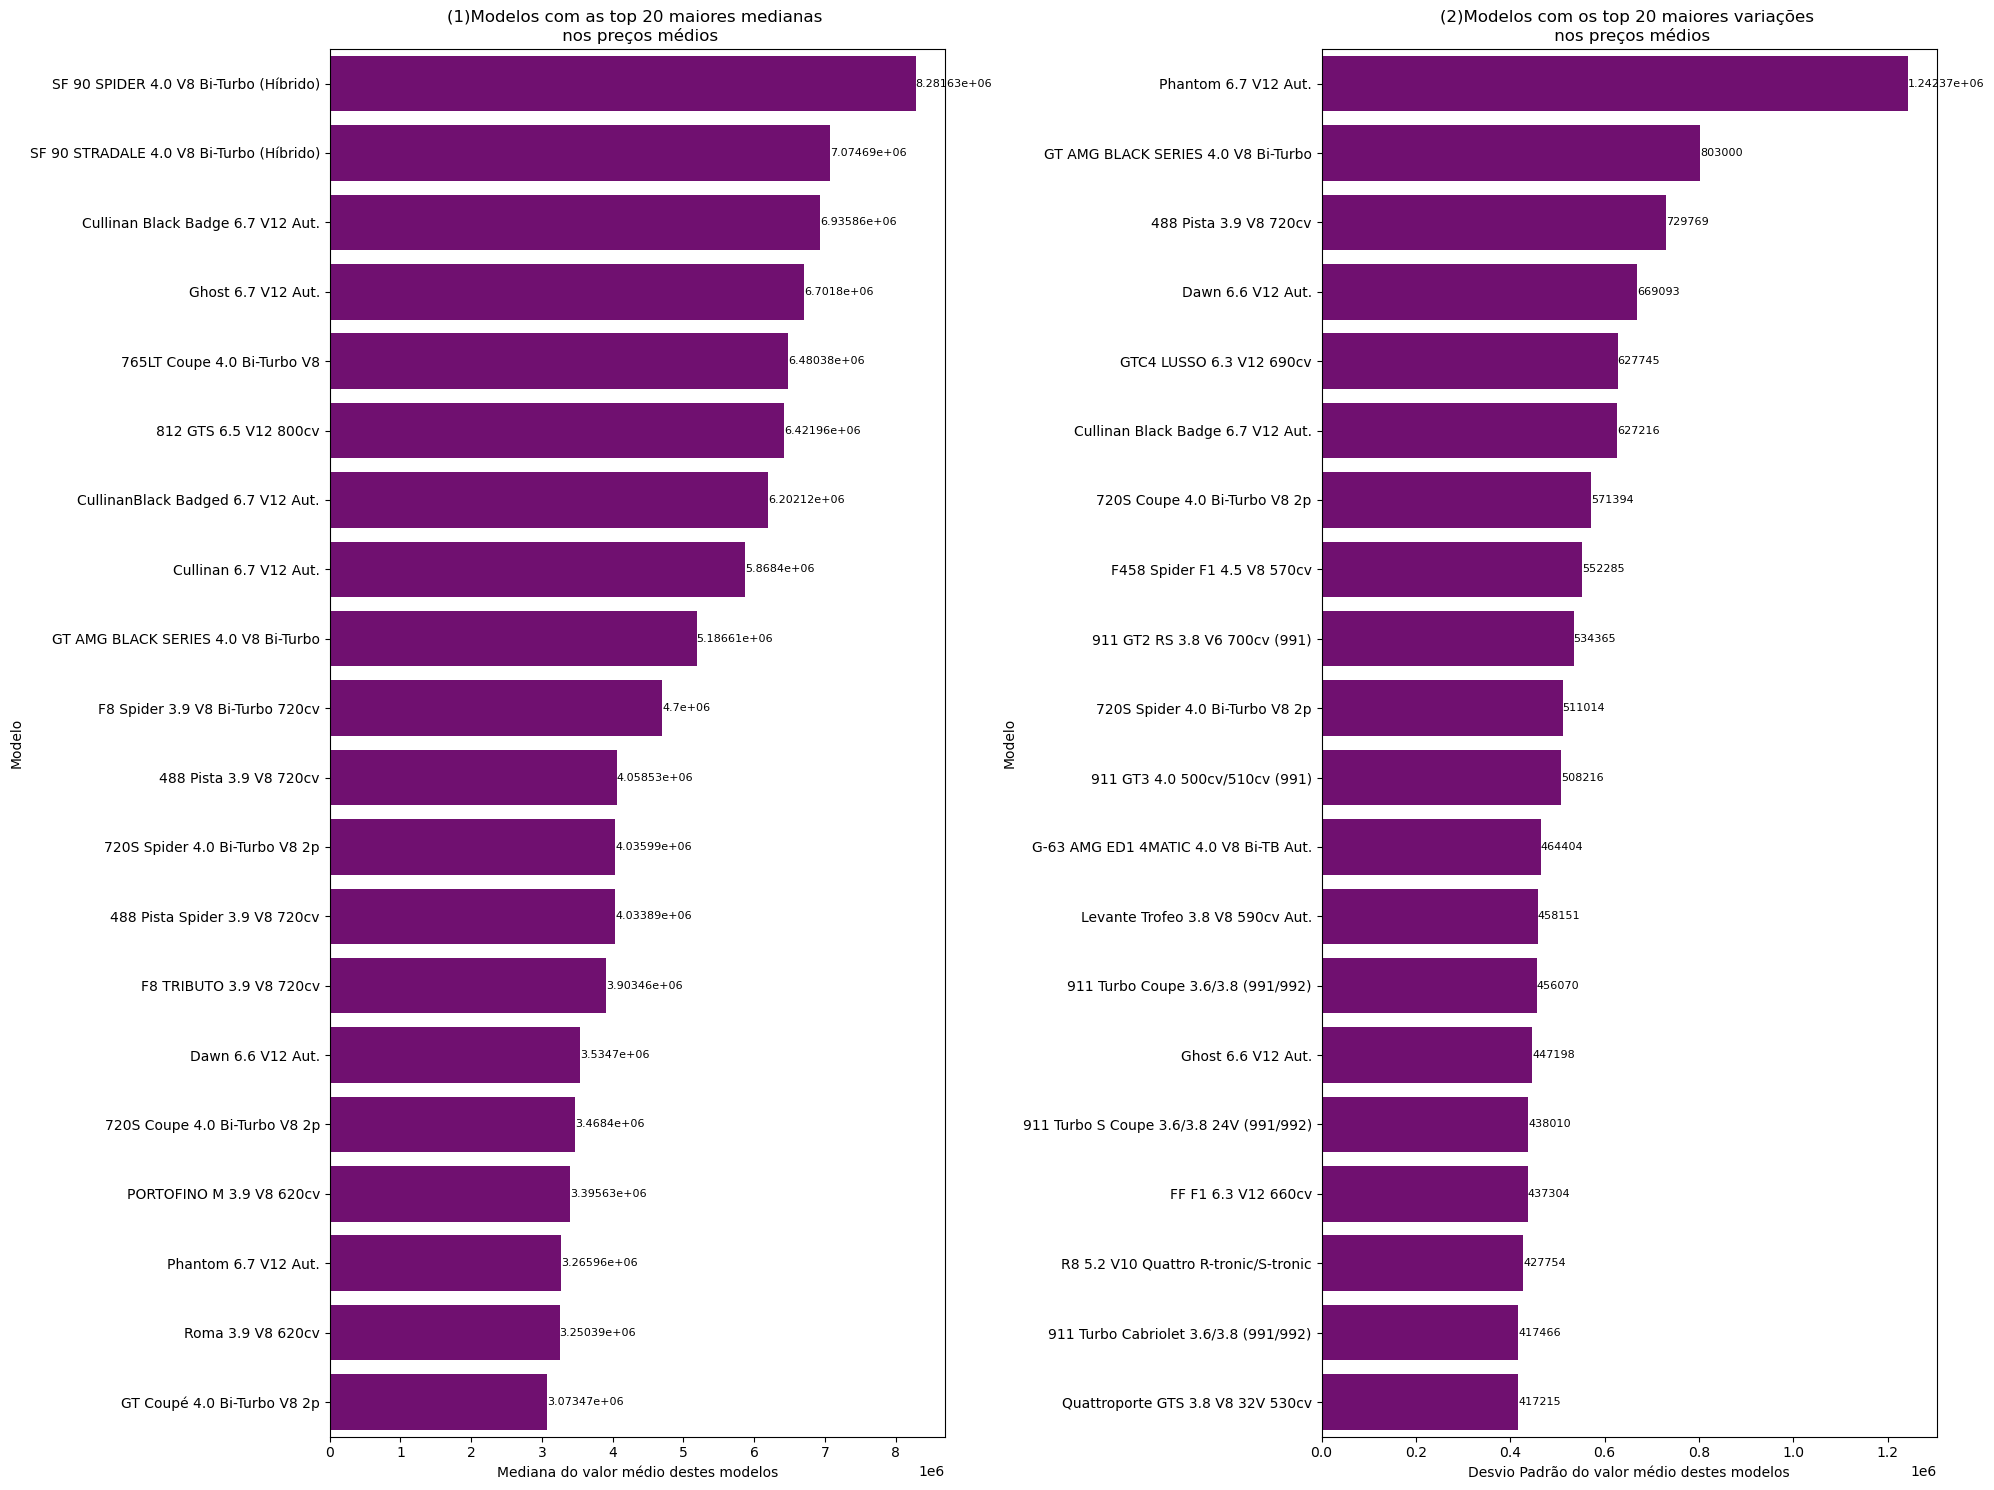

In [52]:
carros_pela_mediana = round((
    df_FIPE_carros.groupby('modelo')['preco_medio_FIPE']
    .median()
    .sort_values(ascending=False)
    .reset_index(name='mediana_preco_medio')
    .head(20)
), 2)

carros_por_desvio_padrao = round((
    df_FIPE_carros.groupby('modelo')['preco_medio_FIPE']
    .std()
    .sort_values(ascending=False)
    .reset_index(name='desvio_padrao_preco_medio')
    .head(20)
), 2)

# Criando os grids 1x2
janela, graficos = plt.subplots(nrows=1, ncols=2, figsize=(20,15))

# Criando o gráfico
fig = sns.barplot(
    data=carros_pela_mediana,
    y="modelo",
    x="mediana_preco_medio",
    color="purple",
    order= carros_pela_mediana['modelo'],
    ax=graficos[0]
)

# Customizações adicionais do gráfico 1
graficos[0].set_title("(1)Modelos com as top 20 maiores medianas \n nos preços médios", fontsize=12)
graficos[0].set_xlabel("Mediana do valor médio destes modelos")
graficos[0].set_ylabel("Modelo")
graficos[0].bar_label(fig.containers[0], fontsize=8)
#------------------------

fig = sns.barplot(
    data=carros_por_desvio_padrao,
    y="modelo",
    x="desvio_padrao_preco_medio",
    color="purple",
    order= carros_por_desvio_padrao['modelo'],
    ax=graficos[1]
)

# Customizações adicionais do gráfico 2
graficos[1].set_title("(2)Modelos com os top 20 maiores variações \n nos preços médios", fontsize=12)
graficos[1].set_xlabel("Desvio Padrão do valor médio destes modelos")
graficos[1].set_ylabel("Modelo")
graficos[1].bar_label(fig.containers[0], fontsize=8)

# Exibir os gráficos
plt.tight_layout()
plt.show()

Tabela para facilitar o entedimento de qual marca cada automóvel pertence

In [53]:
df_FIPE_carros.groupby('modelo').agg(
    marca=('marca', 'first'),
    mediana_dos_precos=('preco_medio_FIPE', 'median'),
    desvio_padrao=('preco_medio_FIPE', 'std')
).sort_values(by='mediana_dos_precos', ascending=False).reset_index().round(2).head(10)

,modelo,marca,mediana_dos_precos,desvio_padrao
0,SF 90 SPIDER 4.0 V8 Bi-Turbo (Híbrido),Ferrari,8281628.0,213330.97
1,SF 90 STRADALE 4.0 V8 Bi-Turbo (Híbrido),Ferrari,7074690.0,313315.48
2,Cullinan Black Badge 6.7 V12 Aut.,Rolls-Royce,6935862.0,627216.04
3,Ghost 6.7 V12 Aut.,Rolls-Royce,6701804.5,250495.94
4,765LT Coupe 4.0 Bi-Turbo V8,Mclaren,6480379.0,261505.84
5,812 GTS 6.5 V12 800cv,Ferrari,6421964.0,357348.95
6,CullinanBlack Badged 6.7 V12 Aut.,Rolls-Royce,6202120.0,315818.84
7,Cullinan 6.7 V12 Aut.,Rolls-Royce,5868397.0,150732.32
8,GT AMG BLACK SERIES 4.0 V8 Bi-Turbo,Mercedes-Benz,5186610.0,802999.57
9,F8 Spider 3.9 V8 Bi-Turbo 720cv,Ferrari,4700000.0,388520.82


In [54]:
df_FIPE_carros.groupby('modelo').agg(
    marca=('marca', 'first'),
    mediana_dos_precos=('preco_medio_FIPE', 'median'),
    desvio_padrao=('preco_medio_FIPE', 'std')
).sort_values(by='desvio_padrao', ascending=False).reset_index().round(2).head(10)

,modelo,marca,mediana_dos_precos,desvio_padrao
0,Phantom 6.7 V12 Aut.,Rolls-Royce,3265965.0,1242370.34
1,GT AMG BLACK SERIES 4.0 V8 Bi-Turbo,Mercedes-Benz,5186610.0,802999.57
2,488 Pista 3.9 V8 720cv,Ferrari,4058529.5,729769.30
3,Dawn 6.6 V12 Aut.,Rolls-Royce,3534704.0,669093.42
4,GTC4 LUSSO 6.3 V12 690cv,Ferrari,2839253.0,627744.71
5,Cullinan Black Badge 6.7 V12 Aut.,Rolls-Royce,6935862.0,627216.04
6,720S Coupe 4.0 Bi-Turbo V8 2p,Mclaren,3468397.0,571394.36
7,F458 Spider F1 4.5 V8 570cv,Ferrari,2245664.0,552285.35
8,911 GT2 RS 3.8 V6 700cv (991),Porsche,2700020.0,534365.49
9,720S Spider 4.0 Bi-Turbo V8 2p,Mclaren,4035987.0,511013.76


**Conclusão:** A maior parte dos carros presentes em ambos os rankings pertence às marcas com as maiores medianas de preços, assim como os maiores desvios padrão. O primeiro lugar em ambas as listas exibe valores significativamente mais discrepantes em comparação com o segundo colocado.

## 6\. Conclusão

Concluímos que o mercado de automóveis no Brasil é vasto, com uma grande variedade de modelos e marcas, cada uma buscando atrair o consumidor final de maneira única. Observamos também que os preços desses veículos são extremamente variados, desde carros que custam menos de R$ 2.000 até veículos que ultrapassam os R$ 8.000.000. No entanto, a maioria dos automóveis se concentra na faixa de preço entre R$ 11.000 e R$ 21.000. <br>

Quanto à idade dos veículos, vemos uma concentração um pouco mais definida, variando entre carros novos e aqueles com até 37 anos. A maioria dos veículos tem menos de um ano de uso, com a frequência diminuindo à medida que os carros envelhecem. <br>

Mais de 80% dos automóveis são movidos a gasolina, e notamos a ausência de carros elétricos em nossa amostra. Aproximadamente 75% dos veículos analisados possuem câmbio manual. <br>